
<div>
<center>
    <br>
    <h1>UNIVERSITY OF LONDON INTERNATIONAL PROGRAMMES</h1>
    <h2>Bachelor of Science (Honours) in Computer Science</h2><br>
    <img src="assets/UOL-Insignia.png" alt="University of London Insignia (image unavailable)" width="200"/><br>
    <h1><b>Deep Learning Breast Cancer Detection</b></h1>
    <h3>Author: Wong Zheng Jie <br><br>
    10246254<br><br><br>
    University of London<br><br>
    Singapore Institute of Management<br><br>
    Module: CM3015 Machine Learning and Neural Networks<br><br>
    Supervisor: Mr Hai Kian Loh<br><br><br>
    <br>
</center>
</div>

 ---

## Abstract

This notebook supports a broader project focused on enhancing breast cancer identification in mammography images through deep learning techniques. Although it is not the primary report, it contains sections that offer contextual support for the code-driven investigation. This notebook records the data manipulation, model setup, training processes, as well as outcomes and evaluations, acting as a reproducible environment for experimentation and ongoing development.

## Introduction

### Project Background

In early 2025, the UK National Health Service (NHS) initiated a significant research project to investigate whether deep learning–assisted X-ray mammography can improve the accuracy of breast cancer screening. If proven effective, a Deep Learning system could replace one of the two radiologists presently reviewing mammograms, leading to faster diagnostic turnaround and allowing specialists to focus on other critical clinical tasks [1][2].
At the core of various deep learning methods for image classification lies Convolutional Neural Networks (CNNs). CNNs apply a succession of filters to the input layer, facilitating the extraction of hierarchical features, making them highly effective for image classification tasks including detecting abnormalities in medical images.
This project aims to improve deep learning breast cancer detection on x-ray mammography images using deep learning methods like CNNs in hopes of relieving specialists for other essential clinical responsibilities.

### Data Source and Relevancy

The dataset selected is the Mini-DDSM dataset [3][4] based on the Digital Database for Screening Mammography (DDSM) dataset. [5]
Several factors preceded the decision to use Mini-DDSM over the original DDSM dataset and other available datasets:

- The original DDSM dataset on itself is one of the most accessible and cleanest breast cancer related public datasets available [6].

- While the Digital Database for Screening Mammography, also known as CBIS-DDSM [7] also provides images, these datasets are stripped from their original identification filename and from the age attribute, limiting its use for certain types of analysis.

- The original DDSM image files are compressed with lossless JPEG (LJPEG) encoding that are generated using broken software (or acknowledged as an outdated tool on the DDSM website), this complicates the direct use of the DDSM dataset. Retrieving the original DDSM dataset for use would lead to a repetition in steps following the Mini-DDSM dataset (e.g. ensuring uncorrupted images, correct annotations, manually examining to remove outliers)

- The Mini-DDSM dataset was carefully assembled from DDSM, involving manual inspection to eliminate anomalies and outliers (such as incorrect entries like mammograms designated for a one-year-old female). Consequently, Mini-DDSM provides a high-quality, well-annotated, and accessible collection of mammographic images, metadata, and annotations, making it especially valuable due to the overall lack of publicly accessible, well annotated healthcare imaging datasets.


### About Breast Cancer

Breast cancer stands as one of the most common types of cancer impacting people globally, occurring more frequently in women, though it is also found in men. As per the World Health Organization (WHO), in 2024, while lung cancer remained as the most commonly occurring cancer (12.4% of the total cases), breast cancer was the second most frequently diagnosed cancer worldwide (11.6% of the total cases) [8]. Timely identification and intervention greatly enhance outlook and survival probabilities, which is why screening methods like mammography are vital in public health programs.

Breast cancer occurs when breast cells grow uncontrollably, leading to the formation of clusters of cancer cells or a tumour. These formations usually begin in the Lobules (milk-producing glands) or the Ducts (thin tubes that carry milk from the lobules to the nipples). [9]
The staging of breast cancer, known as the Tumour, Nodes, and Metastasis (TNM) system, expressed as Roman numerals from 0 through IV, ranges from [10]:

- Stage 0: non-invasive breast cancers, where abnormal cells are present but confined to the part of the breast in which they started.

- Stage I: Invasive cancers are at an early stage where the tumour has extended to adjacent tissues or lymph nodes but is still confined. (tumour less than 2 cm)

- Stage II: Invasive cancers are at an early stage where the tumour has extended to adjacent tissues or lymph nodes but is still confined. (tumour between 2 and 5 cm, and may have spread to nearby lymph nodes)

- Stage III: More advanced local spread, frequently engaging regional lymph nodes.

- Stage IV: Metastatic breast cancer, invasive breast cancer that has spread beyond the breast and lymph nodes to distant organs.

Mammography is a non-invasive imaging method employing low-dose X-rays to investigate breast tissue for indications of cancerous formations [11][12]. Although it continues to be the best method for screening, interpreting it is inherently difficult because of elements such as breast density and the subtlety of early-stage indicators, resulting in both false negatives and false positives. By employing AI and DL methods to mammography images, this study hopes to enhance detection accuracy and support early cancer intervention.



## Aim and Objectives

Although the Mini-DDSM dataset was originally meant for Mammography-based Automatic Age Estimation, it has been repurposed in several works shared on Kaggle with the same or similar objective of breast cancer detection with Convolutional Neural Networks [3].
Several limitations have been identified in existing projects as areas for improvement:

- Many projects utilizing Mini-DDSM do not provide clear documentation of essential steps like data preprocessing and evaluation methods, making it complicated for other researchers to replicate results or expand on their findings.

- Some projects may not apply proper regularization; this can lead to overfitting and poor generalization since the Mini-DDSM dataset is relatively limited.

- Current projects frequently concentrate on model performance metrics, neglecting how these models can be effectively integrated into clinical workflows, restricting real-world implementation insights.

- 
This project seeks to overcome these limitations by conducting comparative analysis between models for breast cancer detection on mammographic images, with the objective of enhancing breast cancer screening accuracy.


## Motivations

Breast cancer continues to be a significant global health issue, with its incidence increasing by around 1% each year from 2012 to 2021, especially in women [13]. Although female breast cancer has been the primary focus of most research and screening initiatives, male breast cancer (MBC) continues to be notably underrepresented in population studies and clinical trials, despite its acknowledgment as a separate clinical entity. [14]

There is also a need to create tools that reduce human mistakes and speed up diagnostic procedures, particularly for the early detection of breast cancer, as timely intervention can significantly improve patient outcomes.

As mentioned by the UK government as well, every four minutes, a person in the UK succumbs to cancer, and an independent investigation of the NHS in England [15] revealed that survival rates for certain cancers in the UK are lower than in comparable countries. AI DL assistance can relieve 1 of 2 radiologists needed for mammogram screenings. This could enable many radiologists and various specialists nationwide to attend to more patients, address increasing cancer rates, save additional lives and reduce waiting lists. [2]

By utilizing deep learning methods, this project seeks to improve the accuracy and effectiveness of breast cancer screening, providing the opportunity to assist radiologists and improve diagnostic consistency.


## Defining the problem and assembling a dataset

The primary objective outlined in this project is a supervised image classification problem, where an initial model is developed to differentiate between mammographic images with and without indications of breast cancer, and is progressively improved upon. Classification is carried out using diagnostic labels found in the dataset, particularly distinguishing between malignant and non-malignant instances.

For this project, the Mini-DDSM dataset [3][4] is utilized as the primary dataset. As outlined in Data Source and Relevancy, it includes annotated mammogram images in standard formats and has been prepared for seamless integration into deep learning processes. The dataset should be split into training, validation, and testing subsets, guaranteeing a stratified class distribution to keep balance throughout each set.


## Choosing a measure of success

In a medical setting, especially for potential clinical settings, like breast cancer detection, depending exclusively on accuracy as a performance measure can be deceptive, particularly in datasets with class imbalance or when the cost of misclassification is asymmetric. In this project, a true positive prediction (detecting cancer when it exists) holds considerably more clinical significance than a true negative prediction. On the other hand, a false negative (wrongly indicating that cancer is absent) might result in postponed diagnosis and treatment, making it crucial to minimise such probable mistakes.

While accuracy will be reported, it is not the main success criterion. To achieve a more comprehensive insight into model behaviour, confusion matrix will be used to illustrate the tallies of true positives, true negatives, false positives, and false negatives. This allows for immediate understanding of the kinds of mistakes the model is making and their frequency. To guarantee a thorough assessment, the following set of applicable performance indicators will also be applied:

- Sensitivity (Recall)
Evaluates the ratio of correctly identified actual positive cases (malignant). Having high sensitivity is essential for reducing the number of false negatives.

- Specificity
Evaluates the model’s capacity to accurately recognize negative instances (benign or normal), aiding in the decrease of false positives.

- Precision
Shows the fraction of accurate positive predictions, taking false positives into account.


- F1-Score
The harmonic mean of precision and recall is beneficial for assessing performance when both false positives and false negatives are relevant.


- Area Under the ROC Curve (AUC-ROC)
Represents the balance between true positive and false positive rates at different thresholds and offers a solid metric of separability.

These metrics will be evaluated on the validation and testing datasets to determine both model performance and generalization. The model's effectiveness will not solely be determined by its numerical outcomes across these metrics but also by its consistency and dependability in reducing significant errors.


## Deciding on an evaluation protocol

To guarantee a strong and impartial assessment of model effectiveness, a clearly defined evaluation protocol should be created. The data is divided into three separate subsets: training, validation, and testing. This permits distinct stages of learning, model adjustment, and ultimate performance assessment without data contamination or overfitting to the test dataset.

The stratified splitting approach is planned to be utilized to preserve the identical ratio of malignant and non-malignant cases throughout all three subsets. This is crucial in medical imaging tasks, where imbalanced datasets frequently occur and might otherwise result in distorted or misleading performance metrics.

Due to the moderate scale of the Mini-DDSM dataset, approaches like data augmentation may be employed to enhance the effective training size and minimize overfitting. Moreover, early stopping and cross-validation could be considered to guarantee that the model generalizes effectively and is not overly tailored to the validation dataset.

This evaluation protocol guarantees that performance metrics accurately represent the model’s generalization capability, especially in real-world clinical screening and medical settings, by distinctly separating training, validation, and testing phases while employing stratified sampling.


## Preparing your data

### Importing Libraries

In [13]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import shutil
import pandas as pd
import numpy as np
import random
import seaborn as sns
import cv2
import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, regularizers, callbacks
from tensorflow.keras.utils import to_categorical

from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold


### Loading and Preparing Dataset

Before preparing the dataset for training, we should understand the data we are dealing with. The Mini-DDSM file structure was examined and included a JPEG-8 and PNG-16 version. The PNG-16 format was chosen because it means 16-bit depth, preserving significantly more pixel intensity details, which is crucial for identifying slight tissue variations. The images are organized into a folder for training purposes and csv file was created to locate masks for identifying cancer biomarker locations.

In [4]:
# directories
# Original Source Folder
source_dir = 'The Complete Mini-DDSM archive/MINI-DDSM-Complete-PNG-16'
# Folder to store images
combined_img_dir = 'Combined_MiniDDSM_imgs'
# Folder to store Mask images
combined_img_mask_dir = 'Combined_MiniDDSM_img_Masks'

# Create output directories for images and masks
for root in [combined_img_dir, combined_img_mask_dir]:
    os.makedirs(root, exist_ok=True)
    for label in ['Benign', 'Cancer', 'Normal']:
        os.makedirs(os.path.join(root, label), exist_ok=True)

# copy images and masks
for label in ['Benign', 'Cancer', 'Normal']:
    label_path = os.path.join(source_dir, label)
    target_label_path = os.path.join(combined_img_dir, label)
    target_mask_label_path = os.path.join(combined_img_mask_dir, label)

    for case_id in os.listdir(label_path):
        case_path = os.path.join(label_path, case_id)

        if os.path.isdir(case_path):
            for file in os.listdir(case_path):
                if file.endswith(('CC.png', 'MLO.png')) and 'Mask' not in file:
                    
                    # Copy image file to the new image folder
                    src_img = os.path.join(case_path, file)
                    dst_img = os.path.join(target_label_path, file)
                    shutil.copyfile(src_img, dst_img)
            
                    # Copy mask image file to the new mask image folder
                    mask_name = file.replace('.png', '_Mask.png')
                    src_mask = os.path.join(case_path, mask_name)
                    if os.path.exists(src_mask):
                        dst_mask = os.path.join(target_mask_label_path, mask_name)
                        shutil.copyfile(src_mask, dst_mask)
    
print(f"Copy Complete")

Copy Complete


In [6]:
# Empty list to hold metadata for images and mask images
data = []

# Iterates over each directory inside the combined image folder
for label in os.listdir(combined_img_dir):
    label_combined_img_dir = os.path.join(combined_img_dir, label)
    label_combined_img_mask_dir = os.path.join(combined_img_mask_dir, label)

    if os.path.isdir(label_combined_img_dir):
        for fname in os.listdir(label_combined_img_dir):
            if fname.lower().endswith('.png'):
                img_path = os.path.join(label_combined_img_dir, fname)
                mask_name = fname.replace('.png', '_Mask.png')
                mask_path = os.path.join(label_combined_img_mask_dir, mask_name)

                # If mask exists then add it to the metadata else label as None
                if os.path.exists(mask_path):
                    data.append({'image_path': img_path, 'mask_path': mask_path, 'label': label})
                else:
                    data.append({'image_path': img_path, 'mask_path': None, 'label': label})

# saving metadata csv file
df = pd.DataFrame(data)
df.to_csv("Combined_MiniDDSM_Metadata.csv", index=False)
print("Saved Combined_MiniDDSM_Metadata.csv")

Saved Combined_MiniDDSM_Metadata.csv


Benign: 2684 images
Cancer: 2716 images
Normal: 2408 images


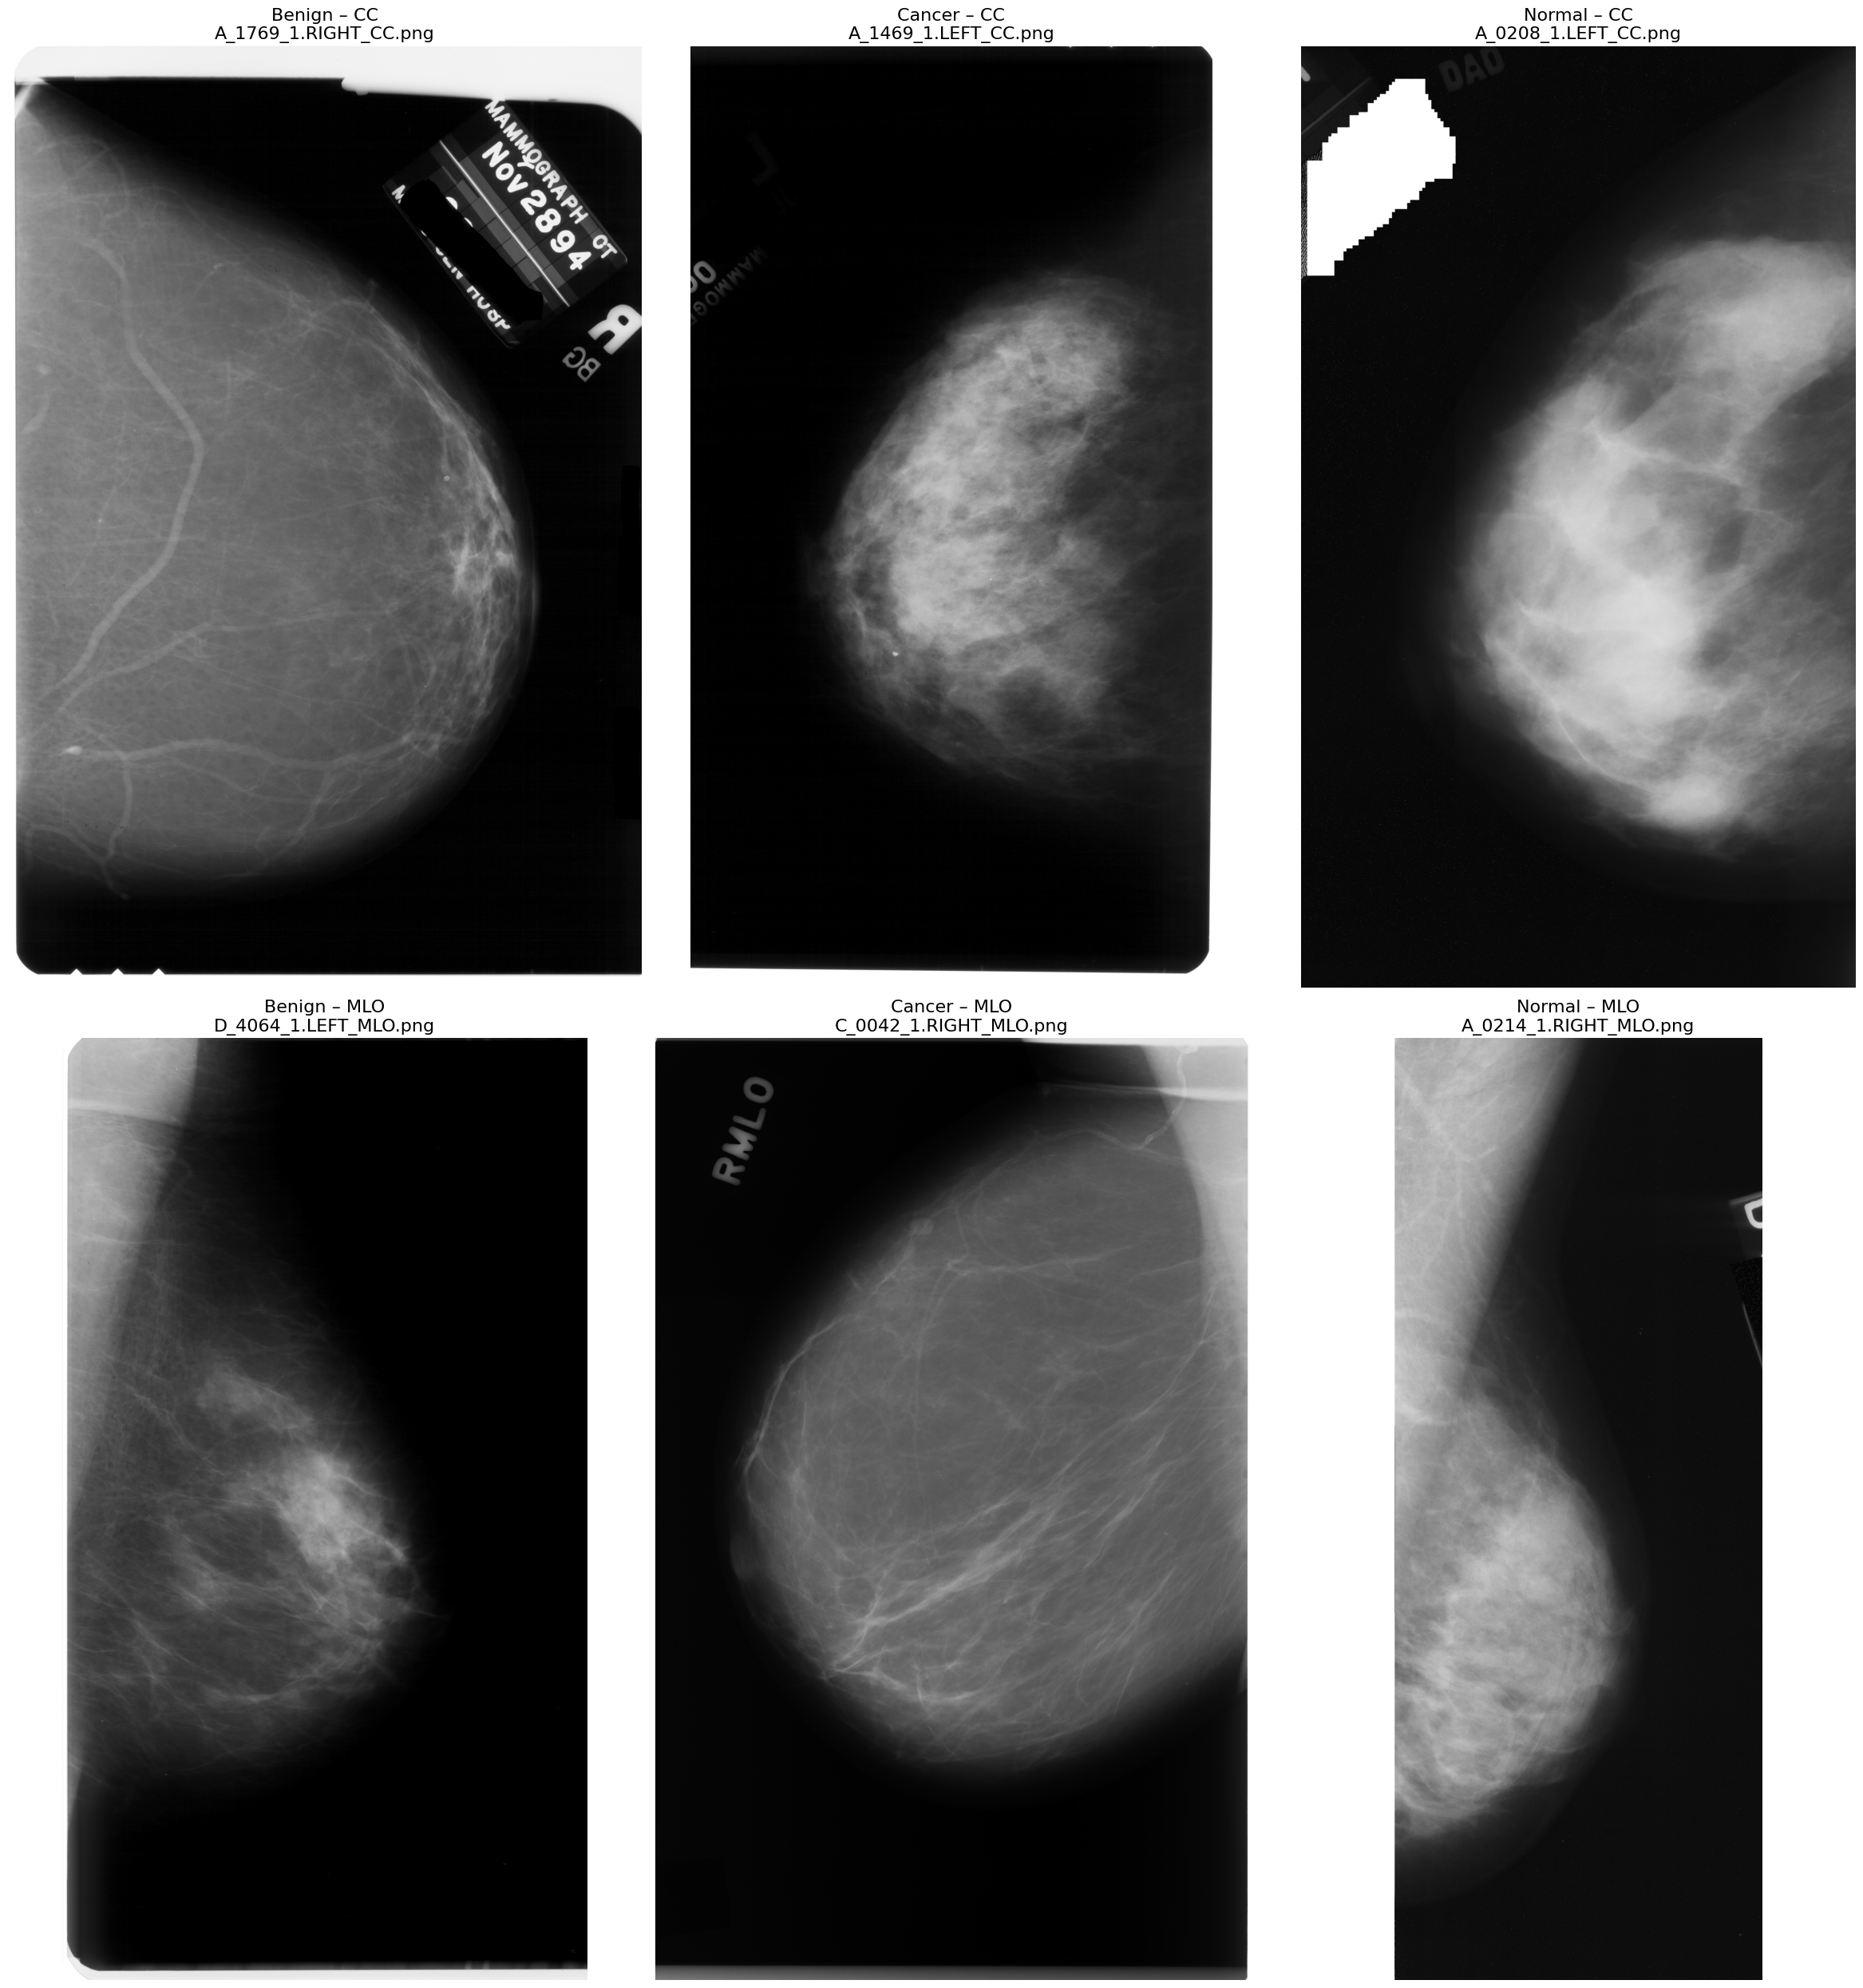

In [8]:
# Classification labels
classes = ['Benign', 'Cancer', 'Normal']

# Print number of .png images per class
for label in os.listdir(combined_img_dir):
    class_path = os.path.join(combined_img_dir, label)
    if os.path.isdir(class_path):
        image_list = [f for f in os.listdir(class_path) if f.lower().endswith('.png')]
        print(f"{label}: {len(image_list)} images")

# Creating figure for viewing
# 1 rows for viewing 'Benign', 'Cancer', 'Normal' CC images and 1 row for viewing 'Benign', 'Cancer', 'Normal' MLO images.
fig, axs = plt.subplots(2, len(classes), figsize=(24, 25))

for col, label in enumerate(classes):
    class_path = os.path.join(combined_img_dir, label)
    all_images = [f for f in os.listdir(class_path) if f.lower().endswith('.png')]

    # randomly picks one CC image
    cc_images = [f for f in all_images if '_CC.png' in f]
    if cc_images:
        cc_file = random.choice(cc_images)
        cc_path = os.path.join(class_path, cc_file)
        cc_img = cv2.imread(cc_path, cv2.IMREAD_GRAYSCALE)
        if cc_img is not None:
            axs[0, col].imshow(cc_img, cmap='gray')
            axs[0, col].set_title(f"{label} – CC\n{cc_file}", fontsize=16)
        else:
            axs[0, col].set_title(f"{label} – CC\n(Load failed)", fontsize=16)
    axs[0, col].axis('off')

    # randomly picks one MLO image
    mlo_images = [f for f in all_images if '_MLO.png' in f]
    if mlo_images:
        mlo_file = random.choice(mlo_images)
        mlo_path = os.path.join(class_path, mlo_file)
        mlo_img = cv2.imread(mlo_path, cv2.IMREAD_GRAYSCALE)
        if mlo_img is not None:
            axs[1, col].imshow(mlo_img, cmap='gray')
            axs[1, col].set_title(f"{label} – MLO\n{mlo_file}", fontsize=16)
        else:
            axs[1, col].set_title(f"{label} – MLO\n(Load failed)", fontsize=16)
    axs[1, col].axis('off')

plt.tight_layout()
plt.show()

The folders included 2 views for each breast, CC and MLO. The CC view presents a vertical (top down) perspective, displaying a larger portion of the whole breast, while the MLO view offers a lateral (side view) perspective of the breast, generally highlighting more of the upper outer area.

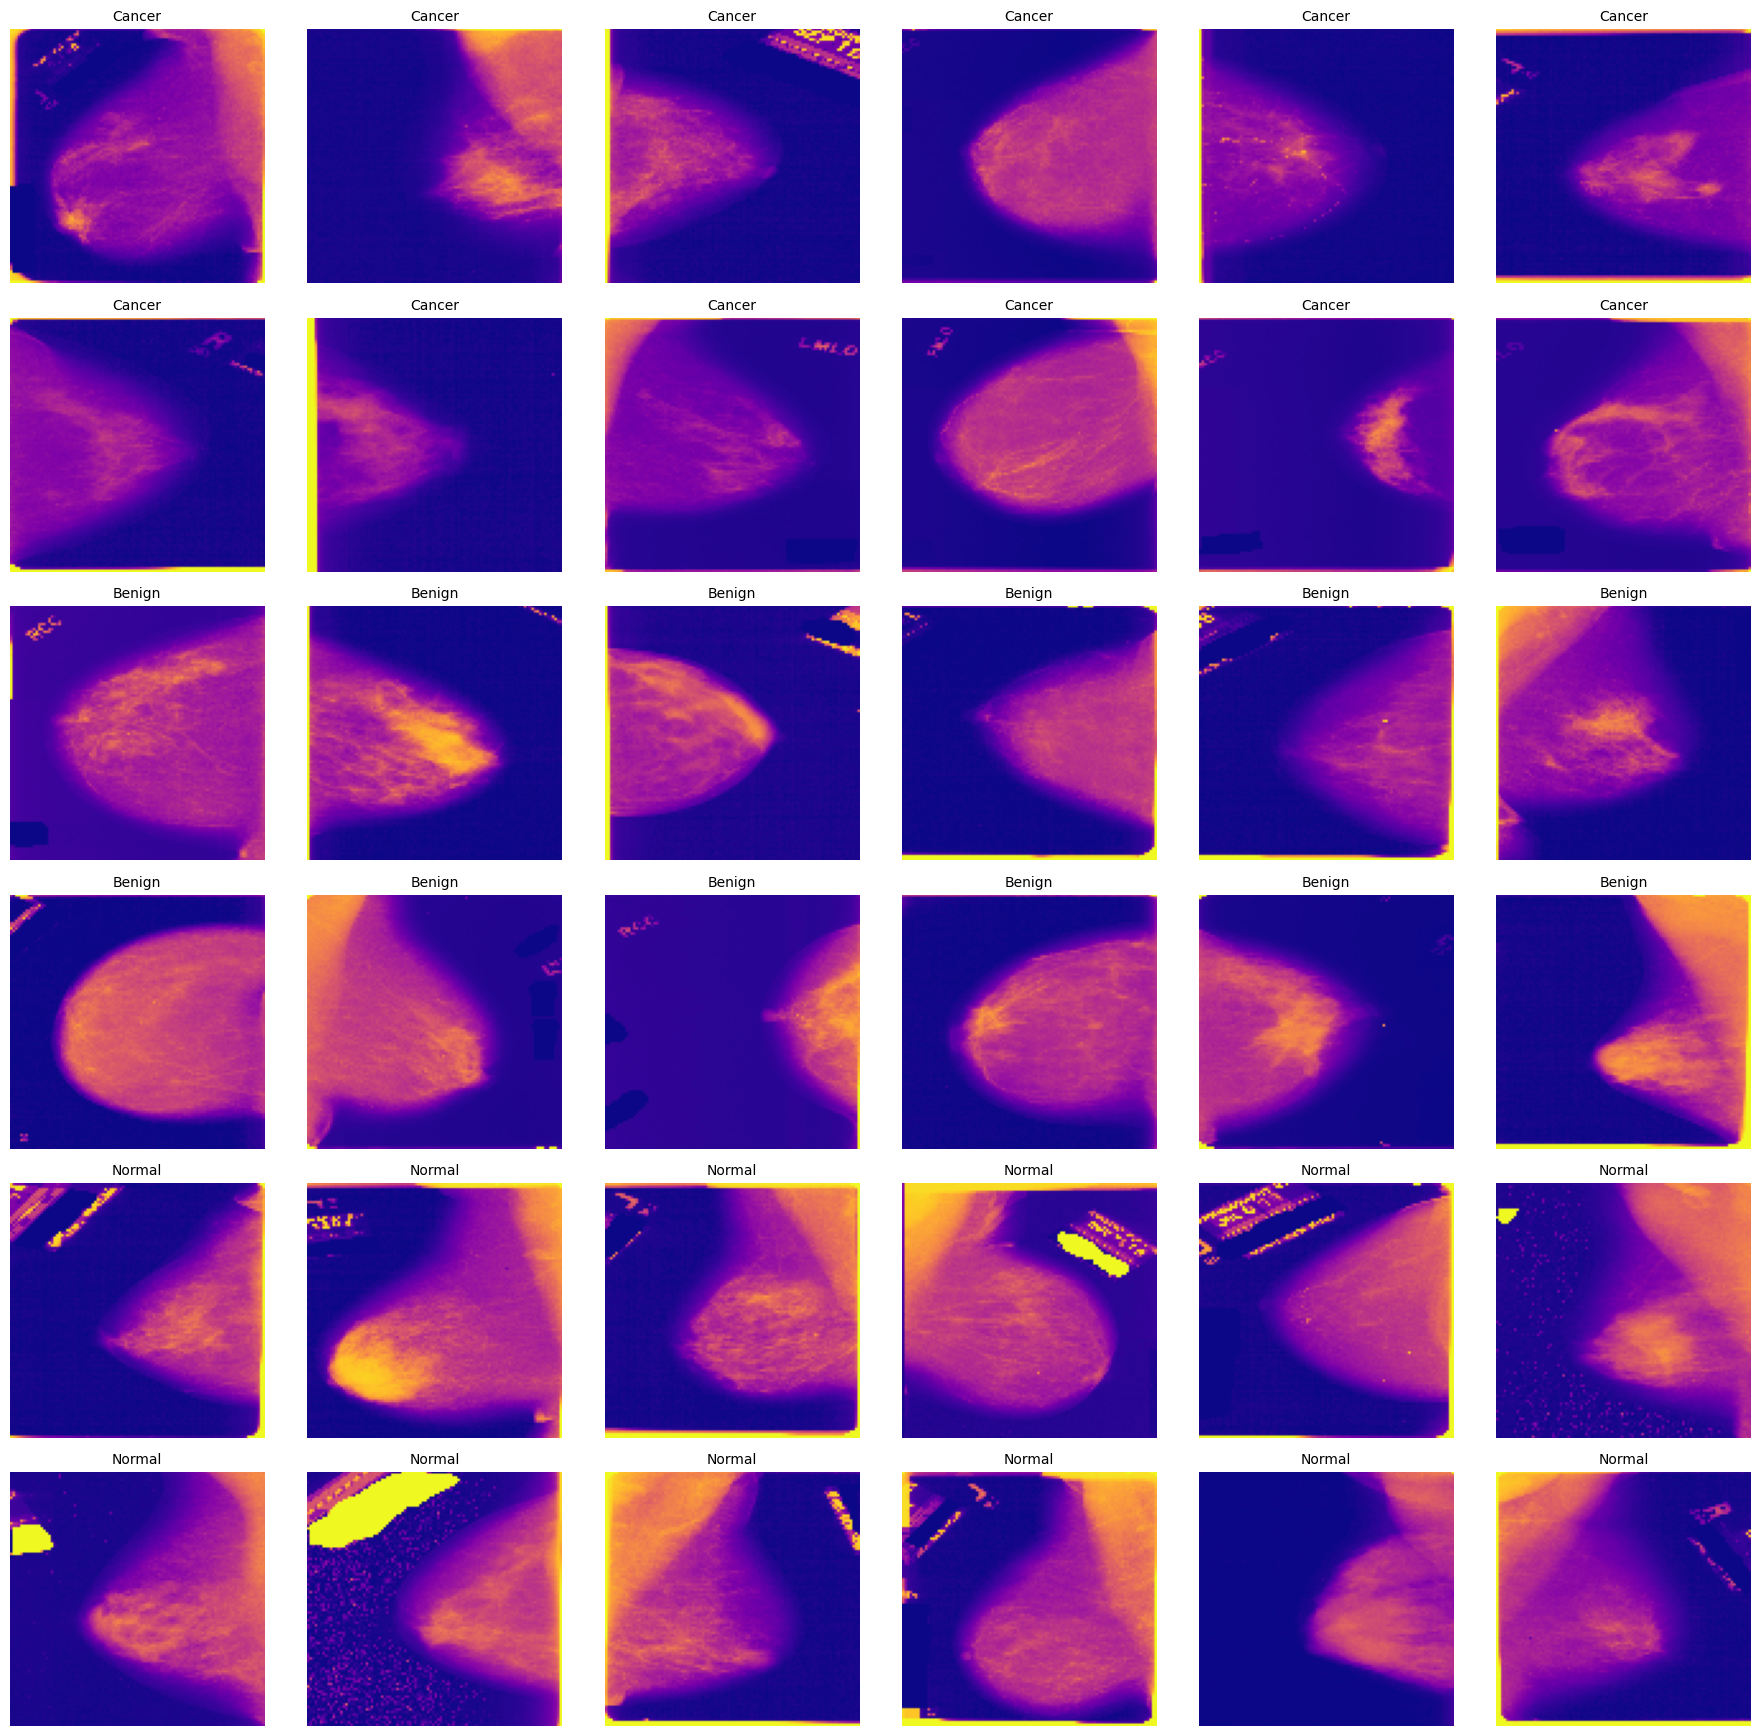

In [11]:
# Get images from 3 classes
cancer_imgs = glob.glob('Combined_MiniDDSM_imgs/Cancer/*.png')
benign_imgs = glob.glob('Combined_MiniDDSM_imgs/Benign/*.png')
normal_imgs = glob.glob('Combined_MiniDDSM_imgs/Normal/*.png')

# Sample 18 from each
some_can = np.random.choice(cancer_imgs, 18, replace=False)
some_ben = np.random.choice(benign_imgs, 18, replace=False)
some_nor = np.random.choice(normal_imgs, 18, replace=False)

# Create 6x6 grid showing the images
fig, axs = plt.subplots(6, 6, figsize=(18, 18))
classes = [('Cancer', some_can), ('Benign', some_ben), ('Normal', some_nor)]

for i, (label, images) in enumerate(classes):
    for j in range(18):
        row = (i * 2) + (j // 6 % 2)
        col = j % 6
        img = image.load_img(images[j], color_mode='grayscale', target_size=(100, 100))
        img_array = image.img_to_array(img).squeeze()

        axs[row, col].imshow(img_array, cmap='plasma')
        axs[row, col].axis('off')
        axs[row, col].set_title(label, fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

The grid above shows randomly selected samples of mammogram images from the Cancer, Benign, and Non-Cancer classes. These samples illustrate the visual intricacy and variability within classes, especially in cancerous cases.

### Preprocessing and Augmentation

Preprocessing and augmentation are being applied to improve generalization. Images are resized to 224×224 pixels with 32 images being processed per batch during training. Images are normalized to to [0.0, 1.0] and 20% of the data is reserved for validation and test. Augmentation was not done for validation and test set so that the model can be evaluated on unaltered images.

In [15]:
# 224×224 pixels input size
img_height, img_width = 224, 224
# Number of samples per batch
batch_size = 32

# preprocessing and augmentation for training set
train_data_generator = ImageDataGenerator(
    # Normalizing pixel values to [0, 1]
    rescale=1./255,
    # Randomly rotates images up to 15 degs
    rotation_range=15,
    # Randomly shifts images up to 10% of width horizontally
    width_shift_range=0.1,
    # Randomly shifts images up to 10% of height vertically
    height_shift_range=0.1,
    # Randomly zooms images up to 10%
    zoom_range=0.1,
    # False to retain left and right original views; no point flipping images horizontally or vertically
    horizontal_flip=False,
    vertical_flip=False,
    # This reserves 20% of data for validation
    validation_split=0.2
)

# preprocessing for validation and test set
# Normalizing pixel values to [0, 1]
test_data_generator = ImageDataGenerator(rescale=1./255)

### Train, Validation, Test Splitting

In [18]:
# training (80% of data)
training_set = train_data_generator.flow_from_directory(
    combined_img_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# validation (20% of data)
validation_set = train_data_generator.flow_from_directory(
    combined_img_dir,
    target_size=(img_height, img_width),
    color_mode='grayscale',
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 6248 images belonging to 3 classes.
Found 1560 images belonging to 3 classes.


### Class Imbalance

After splitting training (80% of data) and validation (20% of data), class imbalance is addressed by adding class weights to prevent biasness. 

Training set class distribution count: {'Benign': np.int64(2148), 'Cancer': np.int64(2173), 'Normal': np.int64(1927)}


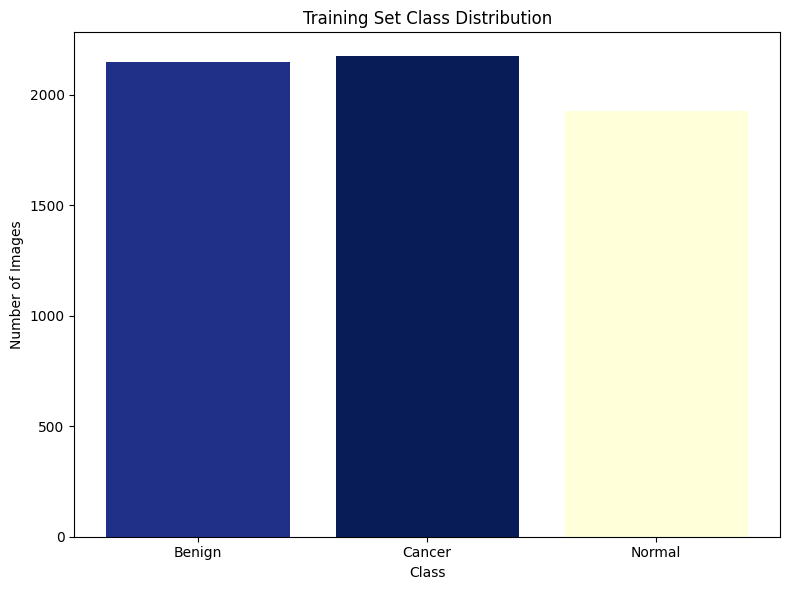

In [21]:
# class labels
labels = training_set.classes

# gets number of samples per class
unique, counts = np.unique(labels, return_counts=True)
print("Training set class distribution count:", dict(zip(training_set.class_indices, counts)))

# class names in order
class_names = list(training_set.class_indices.keys())

# color map and bar chart plotting
cmap = plt.get_cmap('YlGnBu')
norm = Normalize(vmin=min(counts), vmax=max(counts))
colors = [cmap(norm(count)) for count in counts]

plt.figure(figsize=(8, 6))
plt.bar(class_names, counts, color=colors)
plt.title("Training Set Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()

In [23]:
class_weights = compute_class_weight(
    # Assigns weights inversely proportional to class frequencies
    class_weight='balanced',
    # Unique class labels
    classes=np.unique(labels),
    # The list of class labels
    y=labels
)

# Converts class weights to dictionary mapping class index to weight
class_weights_dict = dict(enumerate(class_weights))
print("Class weights:", class_weights_dict)

Class weights: {0: np.float64(0.9695841092489137), 1: np.float64(0.9584292069335788), 2: np.float64(1.0807818716485038)}


## Developing a model that does better than a baseline
### Naive Baseline Model

The naive baseline model acts as a basic reference for assessing more complex architectures later in the project. It utilizes a simple CNN architecture and incorporates class weighting to tackle class imbalance. Although straightforward, this model sets a baseline expected performance and aids in uncovering initial issues, like misclassification trends or sensitivity to underrepresented classes. 

In [27]:
naive_baseline_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1)),

    # 32 filters with 3×3 kernel and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu'),
    # MaxPooling2D(2, 2) downsamples the image by a factor of 2×2
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 128
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="naive_baseline_model")

naive_baseline_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy'])

naive_baseline_model.summary()

Model: "naive_baseline_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,168,771 (42.61 MB)

 Trainable params: 11,168,771 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
naive_baseline_model_history = naive_baseline_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # Number of Epochs
    epochs=20,
    # Class weights to address class imbalance
    class_weight=class_weights_dict
)

C:\Users\Shado\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1341s 7s/step - accuracy: 0.4217 - loss: 24.5553 - val_accuracy: 0.4673 - val_loss: 0.9866
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 870s 4s/step - accuracy: 0.5309 - loss: 0.9030 - val_accuracy: 0.4353 - val_loss: 1.1673
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 585s 3s/step - accuracy: 0.5655 - loss: 0.8321 - val_accuracy: 0.3942 - val_loss: 1.3795
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 587s 3s/step - accuracy: 0.5830 - loss: 0.8220 - val_accuracy: 0.4410 - val_loss: 1.0867
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 604s 3s/step - accuracy: 0.5875 - loss: 0.8202 - val_accuracy: 0.4083 - val_loss: 1.3986
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 595s 3s/step - accuracy: 0.6185 - loss: 0.7536 - val_accuracy: 0.4782 - val_loss: 1.1781
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 599s 3s/step - accuracy: 0.6146 - loss: 0.7419 - val_accuracy: 0.4500 - val_loss: 1.1405
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 593s 3s/step - accuracy: 0.6372 - loss: 0.6994 - val_ac

### Naive Baseline Model Evaluation

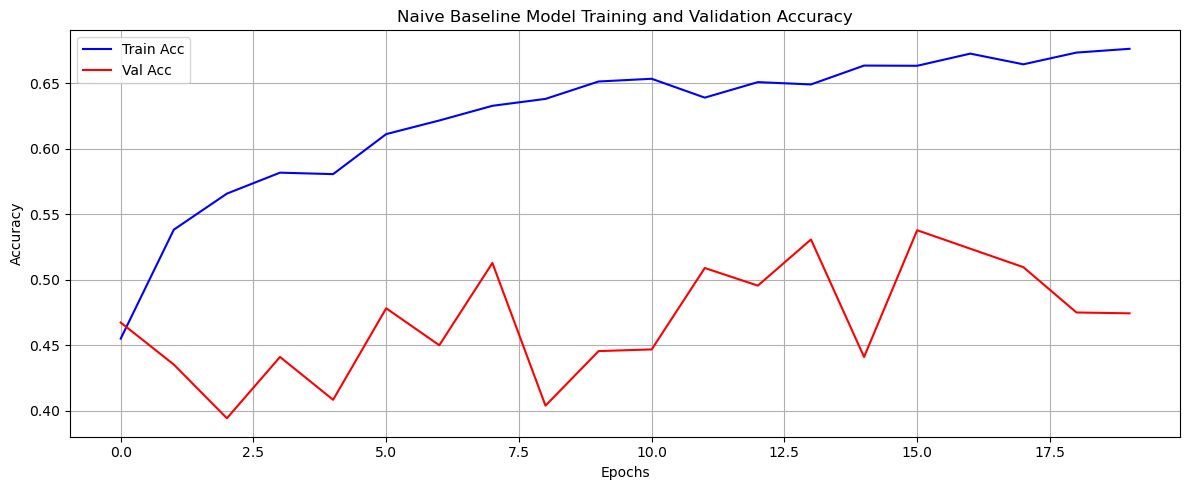

49/49 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step


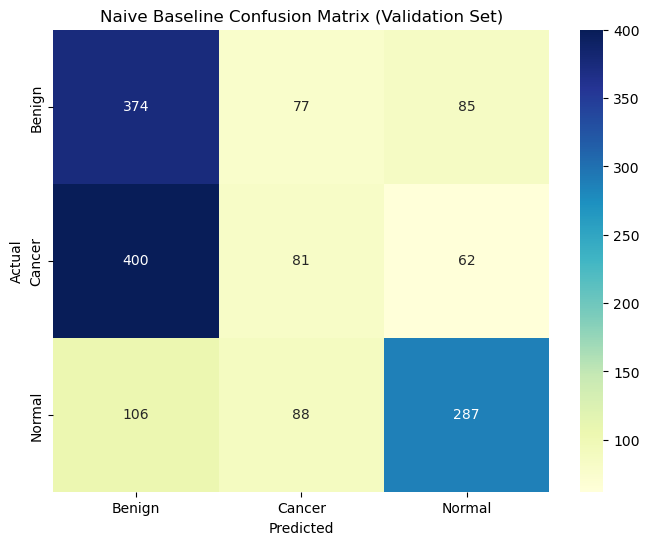

Naive Baseline Scores
              precision    recall  f1-score   support

      Benign       0.42      0.70      0.53       536
      Cancer       0.33      0.15      0.21       543
      Normal       0.66      0.60      0.63       481

    accuracy                           0.48      1560
   macro avg       0.47      0.48      0.45      1560
weighted avg       0.46      0.48      0.45      1560

Naive Baseline AUC-ROC (macro average): 0.6168780193044541


In [32]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(naive_baseline_model_history.history['accuracy'], 'b-', label='Train Acc')
plt.plot(naive_baseline_model_history.history['val_accuracy'], 'r-', label='Val Acc')
plt.title("Naive Baseline Model Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# This predicts labels for validation set
naive_baseline_model_Y_pred = naive_baseline_model.predict(validation_set)
naive_baseline_model_y_pred = np.argmax(naive_baseline_model_Y_pred, axis=1)
naive_baseline_model_y_true = validation_set.classes
naive_baseline_model_class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
naive_baseline_model_confusion_matrix = confusion_matrix(naive_baseline_model_y_true, naive_baseline_model_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(naive_baseline_model_confusion_matrix, annot=True, fmt='d', xticklabels=naive_baseline_model_class_labels, yticklabels=naive_baseline_model_class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Baseline Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Naive Baseline Scores")
print(classification_report(naive_baseline_model_y_true, naive_baseline_model_y_pred, target_names=naive_baseline_model_class_labels,zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
naive_baseline_model_y_true_binarized = label_binarize(naive_baseline_model_y_true, classes=[0, 1, 2])
naive_baseline_model_auc_roc = roc_auc_score(naive_baseline_model_y_true_binarized, naive_baseline_model_Y_pred, average='macro', multi_class='ovr')
print("Naive Baseline AUC-ROC (macro average):", naive_baseline_model_auc_roc)

The training and validation accuracy graphs indicate that the naive baseline model reached a maximum training accuracy of around 65%, while validation accuracy varied between 40% and 54% throughout the epochs. This suggests overfitting and uneven generalization. To tackle class imbalance, weights were used during training, resulting in a more balanced classification. The confusion matrix shows the model could identify all three classes to a certain degree.

Precision, Recall, and F1-Scores are non-zero for all classes, with the Benign class having the highest recall (0.70) and the Normal class attaining the highest F1-score (0.63), indicating the model’s effectiveness in pinpointing normal samples. The Cancer class is the weakest, with an F1-score of 0.21 due to elevated misclassification. Overall, the model achieved an accuracy of 48%, a macro-averaged F1-score of 0.45, and a macro AUC-ROC of 0.62, indicating moderate discriminative capability beyond random chance.

Even with these advancements, the model continues to face considerable misclassifications between Benign and Cancer, which are more difficult to distinguish. Consequently, although the naive baseline provides a strong foundation, it still falls short. The next stage involves developing an enhanced baseline model with more sophisticated architectural elements and regularization methods to better capture underlying patterns and reduce overfitting.


### Baseline Model

The baseline model builds upon the naïve version by adding further improvements designed to enhance learning ability and generalization. Although still quite simple, the baseline model establishes a more solid and resilient benchmark, aiding in bridging the initial architecture with more intricate methods such as stratified cross-validation, transfer learning, or ensemble techniques. It has an essential function in assessing if additional enhancements are genuinely impactful.

In [35]:
baseline_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1)),

    # 32 filters with 3×3 kernel and ReLU activation
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    # MaxPooling2D(2, 2) downsamples the image by a factor of 2×2
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 128 and adds L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu'),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="baseline_model")

baseline_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

baseline_model.summary()

Model: "baseline_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,467 (431.51 KB)

 Trainable params: 110,019 (429.76 KB)

 Non-trainable params: 448 (1.75 KB)

In [43]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('baseline_model.keras', save_best_only=True)

baseline_model_history = baseline_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # Number of Epochs
    epochs=30,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 736s 4s/step - accuracy: 0.6595 - loss: 0.6643 - val_accuracy: 0.4840 - val_loss: 1.9804
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 763s 4s/step - accuracy: 0.6648 - loss: 0.6546 - val_accuracy: 0.3327 - val_loss: 3.8881
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 747s 4s/step - accuracy: 0.6810 - loss: 0.6329 - val_accuracy: 0.2301 - val_loss: 1.4522
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 773s 4s/step - accuracy: 0.6634 - loss: 0.6498 - val_accuracy: 0.2904 - val_loss: 1.8383
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 776s 4s/step - accuracy: 0.6710 - loss: 0.6518 - val_accuracy: 0.3038 - val_loss: 1.9676
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 752s 4s/step - accuracy: 0.6835 - loss: 0.6415 - val_accuracy: 0.4596 - val_loss: 1.2841
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 671s 3s/step - accuracy: 0.6773 - loss: 0.6504 - val_accuracy: 0.4494 - val_loss: 1.3892
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 676s 3s/step - accuracy: 0.6751 - loss: 0.6398 - val_accu

### Baseline Model Evaluation

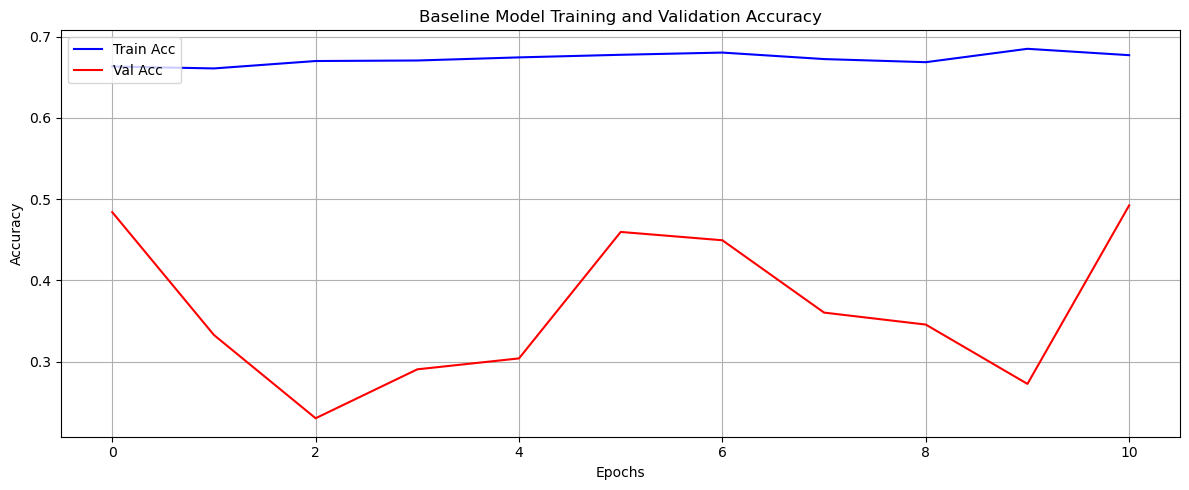

49/49 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step


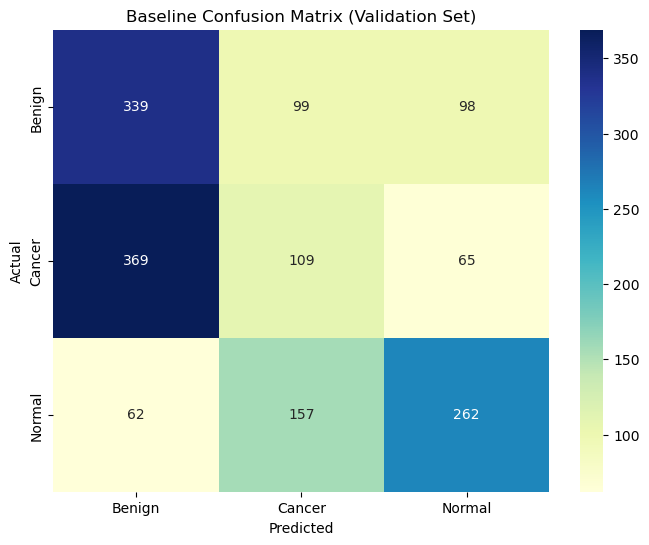

Baseline Model Scores
              precision    recall  f1-score   support

      Benign       0.44      0.63      0.52       536
      Cancer       0.30      0.20      0.24       543
      Normal       0.62      0.54      0.58       481

    accuracy                           0.46      1560
   macro avg       0.45      0.46      0.45      1560
weighted avg       0.45      0.46      0.44      1560

Baseline AUC-ROC (macro average): 0.5815512748174277


In [45]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(baseline_model_history.history['accuracy'], 'b-', label='Train Acc')
plt.plot(baseline_model_history.history['val_accuracy'], 'r-', label='Val Acc')
plt.title("Baseline Model Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# This predicts labels for validation set
baseline_Y_pred = baseline_model.predict(validation_set)
baseline_y_pred = np.argmax(baseline_Y_pred, axis=1)
baseline_y_true = validation_set.classes
baseline_class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
baseline_confusion_matrix = confusion_matrix(baseline_y_true, baseline_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(baseline_confusion_matrix, annot=True, fmt='d', xticklabels=baseline_class_labels, yticklabels=baseline_class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Baseline Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Baseline Model Scores")
print(classification_report(baseline_y_true, baseline_y_pred, target_names=baseline_class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
baseline_y_true_binarized = label_binarize(baseline_y_true, classes=[0, 1, 2])
baseline_auc_roc = roc_auc_score(baseline_y_true_binarized, baseline_Y_pred, average='macro', multi_class='ovr')
print("Baseline AUC-ROC (macro average):", baseline_auc_roc)

The baseline model utilized the same class-weighting method as the naive baseline to address class imbalance. Nonetheless, architectural enhancements and were implemented to enhance generalization and lessen the overfitting seen previously.

Key modifications comprised incorporating Batch Normalization layers following each convolution to enhance and quicken training, utilizing padding='same' to maintain spatial dimensions, and implementing L2 regularization on the last convolutional layer to reduce overfitting. Moreover, Global Average Pooling took the place of Flatten() to lessen overfitting and enhance spatial generalization, whereas early stopping and model checkpointing were implemented to maintain the best model and avoid redundant training.

The training and validation accuracy plots illustrate that the model consistently achieved a high and steady training accuracy of approximately 67%, whereas the validation accuracy exhibited considerable fluctuations, varying between 24% and 50%. This significant difference shows that overfitting continues to be a problem, even with modifications to the architecture and early stopping techniques.

The confusion matrix shows that each of the three classes was identified to different degrees. The model recorded its highest recall (0.63) for the Benign class and the top F1-score (0.58) for the Normal class. Nonetheless, it persisted in having difficulty accurately identifying Cancer cases, reaching merely 0.20 recall and 0.24 F1-score. The prevalence of misclassifications between Benign and Cancer highlights the challenge in differentiating between these two visually alike groups. The model recorded an overall accuracy of 46%, a macro-averaged F1-score of 0.45, and a macro AUC-ROC of 0.58, which is somewhat less than the naive baseline’s AUC-ROC. These findings indicate that although the model has improved in recognizing benign and normal patterns, its capacity to identify cancer continues to be inadequate.


## Scaling up: developing a model that overfits

Understanding the intricacies required to align the data is vital for determining appropriate model architecture and regularization techniques. The overfitting model assists us in identifying the point when the model becomes overly intricate and starts to overfit, which helps in choosing regularization techniques. The epochs were set to 50, and larger filter sizes were employed to achieve overfitting.

### Overfitting Model

In [25]:
# This is the overfitting model without dropout and regularization)
overfitting_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1)),

    # 64 filters with 3×3 kernel and ReLU activation
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    # MaxPooling2D(2, 2) downsamples the image by a factor of 2×2
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 128
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # Filter is being increased to 256
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    layers.Dense(512, activation='relu'),
    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="overfitting_model")

overfitting_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

overfitting_model.summary()

Model: "overfitting_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,963 (4.89 MB)

 Trainable params: 1,279,171 (4.88 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [27]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('overfitting_model.keras', save_best_only=True)

overfitting_model_history = overfitting_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs changed fom 30 to 50 for overfitting
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping]
)

C:\Users\Shado\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1418s 7s/step - accuracy: 0.5689 - loss: 0.8171 - val_accuracy: 0.3038 - val_loss: 1.7918
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1326s 7s/step - accuracy: 0.6234 - loss: 0.6952 - val_accuracy: 0.3487 - val_loss: 4.4364
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1337s 7s/step - accuracy: 0.6414 - loss: 0.6679 - val_accuracy: 0.3974 - val_loss: 5.2654
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1315s 7s/step - accuracy: 0.6478 - loss: 0.6750 - val_accuracy: 0.3090 - val_loss: 1.3252
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1429s 7s/step - accuracy: 0.6321 - loss: 0.6860 - val_accuracy: 0.3500 - val_loss: 6.6782
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1334s 7s/step - accuracy: 0.6650 - loss: 0.6349 - val_accuracy: 0.3474 - val_loss: 9.2504
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1337s 7s/step - accuracy: 0.6745 - loss: 0.6212 - val_accuracy: 0.3551 - val_loss: 6.8466
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1345s 7s/step - accuracy: 0.6859 - loss: 0.6187 - 

### Overfitting Model Evaluation

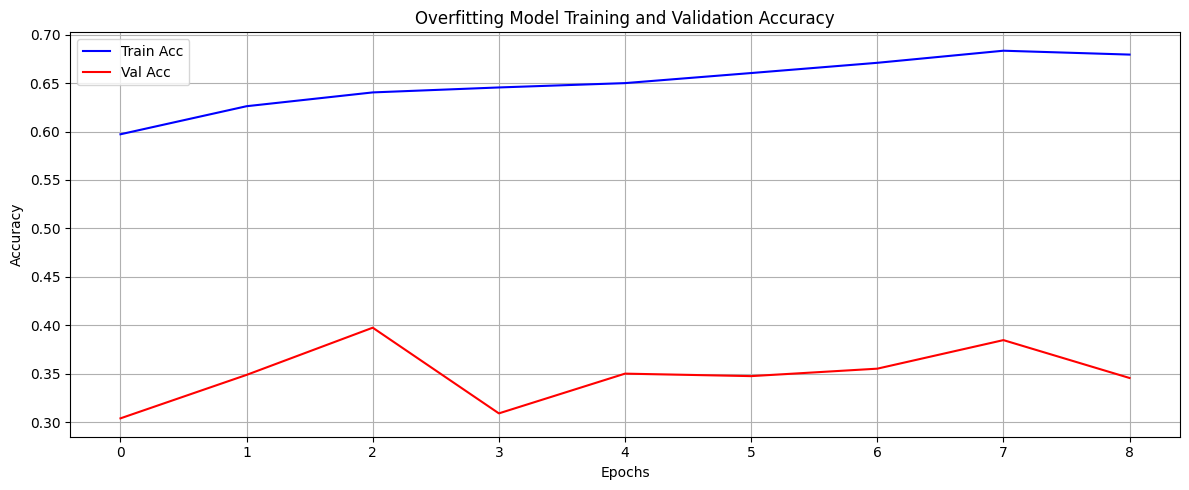

49/49 ━━━━━━━━━━━━━━━━━━━━ 289s 6s/step


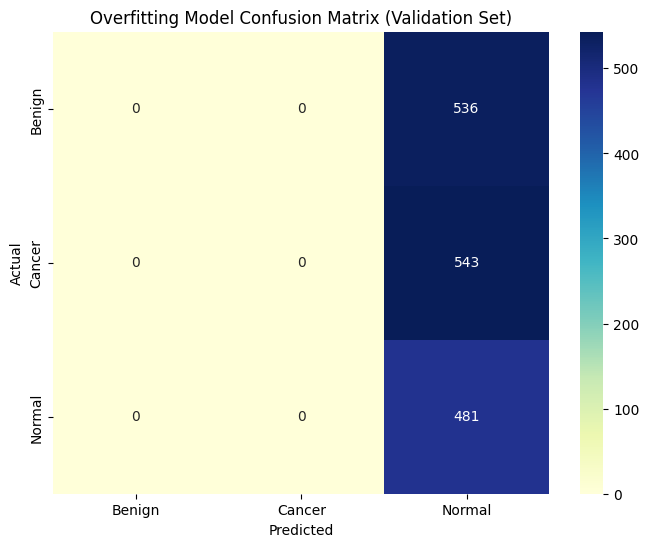

Overfitting Model Scores
              precision    recall  f1-score   support

      Benign       0.00      0.00      0.00       536
      Cancer       0.00      0.00      0.00       543
      Normal       0.31      1.00      0.47       481

    accuracy                           0.31      1560
   macro avg       0.10      0.33      0.16      1560
weighted avg       0.10      0.31      0.15      1560

Overfitting Model AUC-ROC (macro average): 0.6539354826072193


In [31]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(overfitting_model_history.history['accuracy'], 'b-', label='Train Acc')
plt.plot(overfitting_model_history.history['val_accuracy'], 'r-', label='Val Acc')
plt.title("Overfitting Model Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()

# This predicts labels for validation set
overfitting_Y_pred = overfitting_model.predict(validation_set)
overfitting_y_pred = np.argmax(overfitting_Y_pred, axis=1)
overfitting_y_true = validation_set.classes
overfitting_class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
overfitting_confusion_matrix = confusion_matrix(overfitting_y_true, overfitting_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(overfitting_confusion_matrix, annot=True, fmt='d', xticklabels=overfitting_class_labels, yticklabels=overfitting_class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Overfitting Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Overfitting Model Scores")
print(classification_report(overfitting_y_true, overfitting_y_pred, target_names=overfitting_class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
overfitting_y_true_binarized = label_binarize(overfitting_y_true, classes=[0, 1, 2])
overfitting_auc_roc = roc_auc_score(overfitting_y_true_binarized, overfitting_Y_pred, average='macro', multi_class='ovr')
print("Overfitting Model AUC-ROC (macro average):", overfitting_auc_roc)

The overfitting model reached a notable training accuracy of around 68%, but validation accuracy remained low, ranging from 31% to 39% throughout. This significant difference suggests extreme overfitting, as the model retains the training data yet does not apply to unfamiliar validation data.

Class weights were implemented, but the model did not utilize them effectively, as indicated by the confusion matrix, which showed that all validation samples were categorized as Normal regardless of their true class. Consequently, both the Benign and Cancer categories achieved zero recall and F1-scores, whereas the Normal category reached a recall of 1.00 and an F1-score of 0.47, solely because of the classifier’s inclination towards dominant predictions.

The model attained an accuracy of 31%, yielding a macro-averaged F1-score of 0.16, which suggests a poorer class balance compared to earlier models. The AUC-ROC macro average reached 0.65, indicating the model's effectiveness in ranking predictions accurately, even with misclassifications.
These results highlight the limitations of the current configuration, emphasizing the need for stricter regularization and architectural adjustments. The findings reaffirm the importance of addressing overfitting explicitly before progressing to further enhancements.


## Regularizing model and tuning hyperparameters

### Stratified K-fold Cross Validation

Stratified K-fold Cross-Validation was applied pre regularized model implementation to guarantee a thorough and equitable assessment while preserving class distribution among folds, offering insight into the stability and generalization ability of the baseline model before implementing advanced regularization and hyperparameter optimization.

In [34]:
# This is for numpy arrays for images and labels
data_dir = 'Combined_MiniDDSM_imgs'
classes = ['Benign', 'Cancer', 'Normal']
# img_height and img_width remains same, 224, 224, note to self: maybe increase them to cover the breast cancer areas?
img_height, img_width = 224, 224

X = []
y = []

for idx, label in enumerate(classes):
    class_dir = os.path.join(data_dir, label)
    for file in tqdm(os.listdir(class_dir), desc=f"Loading {label}"):
        if file.endswith('.png'):
            img = cv2.imread(os.path.join(class_dir, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (img_width, img_height))
            img = img.astype('float32') / 255.0
            X.append(img)
            y.append(idx)

X = np.expand_dims(np.array(X), -1)
y = np.array(y)  # Shape: (N,)

Loading Normal: 100%|██████████| 2408/2408 [05:14<00:00,  7.66it/s]


In [43]:
# This is the Class-wise stratified K-Fold cross-validator from sklearn
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# This clears the list before running folds, in case of re-running the folds, it will accumulate results across repeated runs if not cleared
fold_accuracies = []
fold_aucs = []
fold_losses = []

print(f"Cleared")

Cleared


In [45]:
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"\nFold {fold + 1}")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    y_train_cat = to_categorical(y_train, num_classes=3)
    y_val_cat = to_categorical(y_val, num_classes=3)

    # Model definition (same as baseline for fair comparison)
    fold_model = models.Sequential([
        layers.Input(shape=(img_height, img_width, 1)),

        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(2, 2),

        layers.GlobalAveragePooling2D(),

        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),

        layers.Dense(3, activation='softmax')
    ])

    fold_model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    early_stopping = callbacks.EarlyStopping(patience=5, restore_best_weights=True)

    history = fold_model.fit(
        X_train, y_train_cat,
        validation_data=(X_val, y_val_cat),
        epochs=30,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    # Evaluation
    val_loss, val_accuracy = fold_model.evaluate(X_val, y_val_cat, verbose=0)
    fold_accuracies.append(val_accuracy)
    fold_losses.append(val_loss)

    y_val_pred_probs = fold_model.predict(X_val)
    y_val_bin = label_binarize(y_val, classes=[0, 1, 2])
    auc = roc_auc_score(y_val_bin, y_val_pred_probs, average='macro', multi_class='ovr')
    fold_aucs.append(auc)

    # This print out a result summary of each fold
    print(f"Fold {fold + 1} results summary:")
    print(f"Accuracy: {val_accuracy:.4f}, Loss: {val_loss:.4f}, AUC-ROC: {auc:.4f}")



Fold 1
Epoch 1/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.5229 - loss: 0.9890 - val_accuracy: 0.3438 - val_loss: 1.4306
Epoch 2/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 288s 1s/step - accuracy: 0.6132 - loss: 0.8224 - val_accuracy: 0.3995 - val_loss: 1.2855
Epoch 3/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 290s 1s/step - accuracy: 0.6365 - loss: 0.7697 - val_accuracy: 0.5147 - val_loss: 1.1433
Epoch 4/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.6343 - loss: 0.7433 - val_accuracy: 0.5064 - val_loss: 1.0695
Epoch 5/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.6426 - loss: 0.7492 - val_accuracy: 0.4616 - val_loss: 1.0305
Epoch 6/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 270s 1s/step - accuracy: 0.6490 - loss: 0.7261 - val_accuracy: 0.5666 - val_loss: 0.8546
Epoch 7/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 238s 1s/step - accuracy: 0.6487 - loss: 0.7206 - val_accuracy: 0.5563 - val_loss: 0.8095
Epoch 8/30
196/196 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.6633 - loss: 0.7010 - 

### Stratified K-fold Cross Validation Result Summary

In [49]:
print("Stratified K-Fold Cross-Validation Result Sumary")
print(f"Mean Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Mean Loss: {np.mean(fold_losses):.4f} ± {np.std(fold_losses):.4f}")
print(f"Mean AUC-ROC: {np.mean(fold_aucs):.4f} ± {np.std(fold_aucs):.4f}")

Stratified K-Fold Cross-Validation Result Sumary
Mean Accuracy: 0.6278 ± 0.0150
Mean Loss: 0.7892 ± 0.0526
Mean AUC-ROC: 0.8196 ± 0.0177


### Regularized Model

To address overfitting, regularization methods were implemented. Dropout was applied to randomly disable some input units during training, ensuring the model doesn't overly rely on specific neurons. Furthermore, L2 regularization was applied to penalize excessive weight values by incorporating a term proportional to the squared weights into the loss function, encouraging the model to identify more generalizable patterns.

In [27]:
regularized_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1), name='input_layer'),

    # 32 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 128
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="regularized_model")

regularized_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

regularized_model.summary()

Model: "regularized_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 112, 112, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 56, 56, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 28, 28, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,467 (431.51 KB)

 Trainable params: 110,019 (429.76 KB)

 Non-trainable params: 448 (1.75 KB)

In [29]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('regularized_model.keras', save_best_only=True)

history = regularized_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs remain at 50 from overfitting model
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

C:\Users\Shado\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1468s 7s/step - accuracy: 0.4770 - loss: 1.2286 - val_accuracy: 0.4192 - val_loss: 1.2720
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1264s 6s/step - accuracy: 0.5292 - loss: 1.0756 - val_accuracy: 0.3994 - val_loss: 1.3022
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1173s 6s/step - accuracy: 0.5693 - loss: 0.9903 - val_accuracy: 0.4558 - val_loss: 1.2770
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1056s 5s/step - accuracy: 0.5869 - loss: 0.9366 - val_accuracy: 0.4756 - val_loss: 1.3326
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1056s 5s/step - accuracy: 0.5941 - loss: 0.8986 - val_accuracy: 0.5090 - val_loss: 1.3511
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1078s 5s/step - accuracy: 0.6034 - loss: 0.8638 - val_accuracy: 0.2917 - val_loss: 1.3131
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1058s 5s/step - accuracy: 0.6099 - loss: 0.8587 - val_accuracy: 0.4327 - val_loss: 1.4794
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1066s 5s/step - accuracy: 0.6050 - loss: 0.8358 - 

### Regularized Model Evaluation

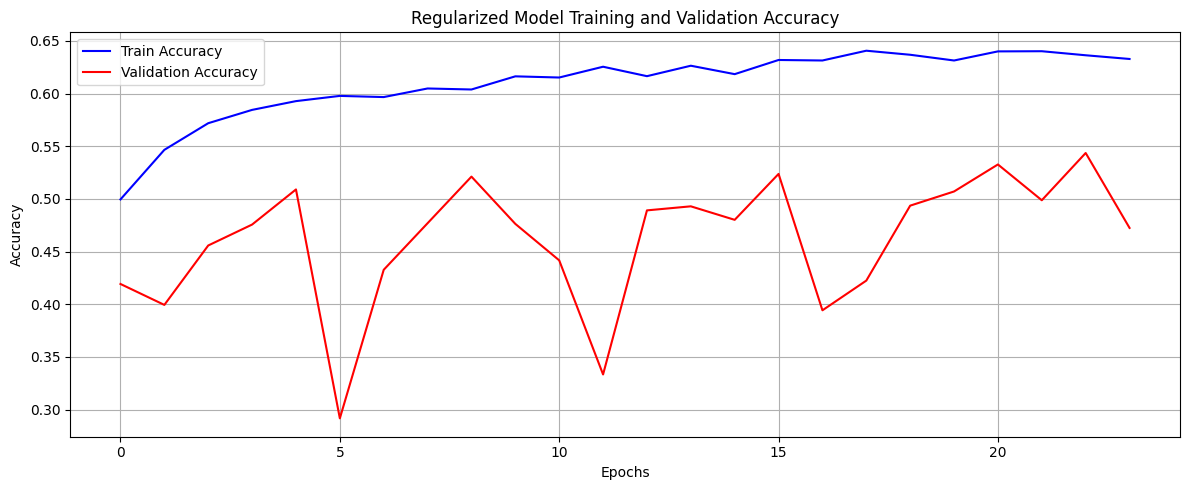

49/49 ━━━━━━━━━━━━━━━━━━━━ 274s 6s/step


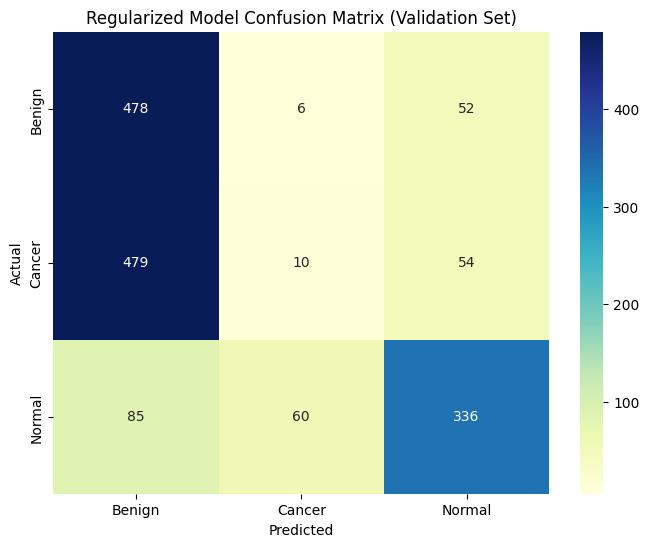

Regularized Model Scores
              precision    recall  f1-score   support

      Benign       0.46      0.89      0.61       536
      Cancer       0.13      0.02      0.03       543
      Normal       0.76      0.70      0.73       481

    accuracy                           0.53      1560
   macro avg       0.45      0.54      0.46      1560
weighted avg       0.44      0.53      0.44      1560

Regularized Model AUC-ROC (macro average): 0.6720


In [32]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Regularized Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs = regularized_model.predict(validation_set)
y_pred = np.argmax(Y_pred_probs, axis=1)
y_true = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Regularized Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Regularized Model Scores")
print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
auc_roc = roc_auc_score(y_true_bin, Y_pred_probs, average='macro', multi_class='ovr')
# changed to .4f for easier reading, too many nums
print(f"Regularized Model AUC-ROC (macro average): {auc_roc:.4f}")

## Wider, Deeper, Narrower Models

### Wider Model

In [33]:
wider_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1), name='input_layer'),

    # 64 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 128
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 256
    layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 256 neurons
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="wider_model")

wider_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

wider_model.summary()

Model: "wider_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 224, 224, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_6             │ (None, 112, 112, 64)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_7             │ (None, 56, 56, 128)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 56, 56, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_8             │ (None, 28, 28, 256)    │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 438,019 (1.67 MB)

 Trainable params: 437,123 (1.67 MB)

 Non-trainable params: 896 (3.50 KB)

In [35]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('wider_model.keras', save_best_only=True)

history = wider_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs remain at 50 from overfitting model
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 978s 5s/step - accuracy: 0.4943 - loss: 1.4604 - val_accuracy: 0.4096 - val_loss: 1.5286
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1402s 7s/step - accuracy: 0.5434 - loss: 1.2203 - val_accuracy: 0.2115 - val_loss: 1.4981
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1433s 7s/step - accuracy: 0.5731 - loss: 1.0927 - val_accuracy: 0.2776 - val_loss: 1.5276
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1300s 7s/step - accuracy: 0.5825 - loss: 0.9925 - val_accuracy: 0.3462 - val_loss: 1.2610
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 951s 5s/step - accuracy: 0.5945 - loss: 0.9441 - val_accuracy: 0.2071 - val_loss: 1.4356
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 851s 4s/step - accuracy: 0.6079 - loss: 0.9150 - val_accuracy: 0.3449 - val_loss: 1.4705
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 867s 4s/step - accuracy: 0.6349 - loss: 0.8555 - val_accuracy: 0.4667 - val_loss: 1.2281
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 914s 5s/step - accuracy: 0.6127 - loss: 0.8481 - val_a

### Wider Model Evaluation

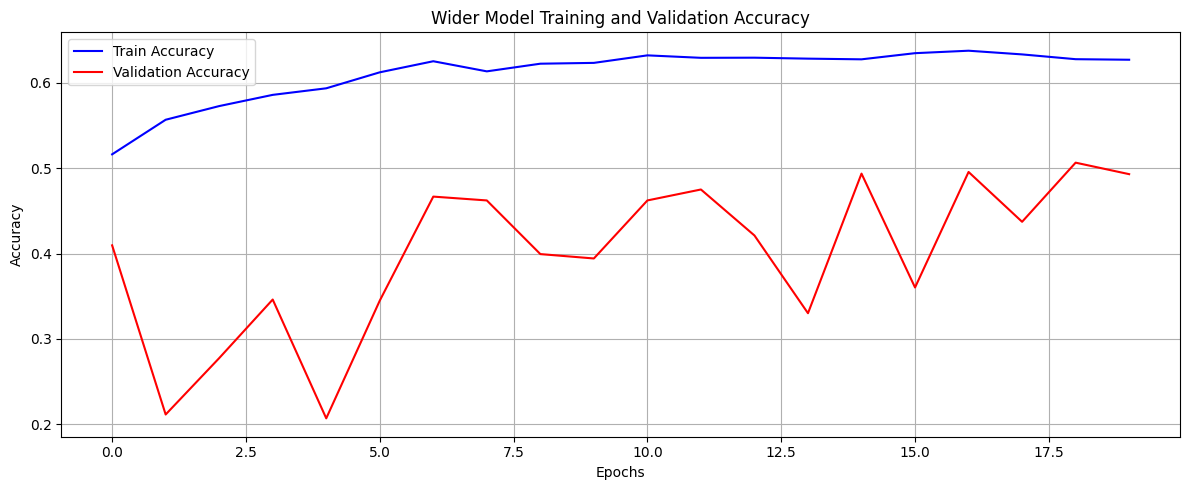

49/49 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step


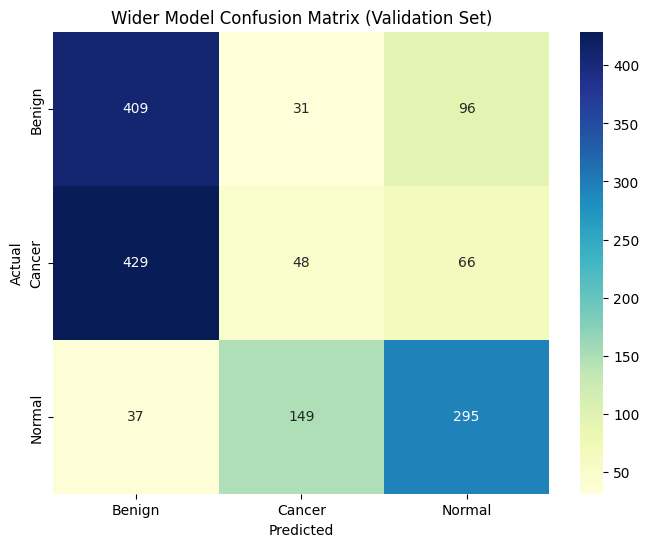

Wider Model Scores
              precision    recall  f1-score   support

      Benign       0.47      0.76      0.58       536
      Cancer       0.21      0.09      0.12       543
      Normal       0.65      0.61      0.63       481

    accuracy                           0.48      1560
   macro avg       0.44      0.49      0.44      1560
weighted avg       0.43      0.48      0.44      1560

Wider Model AUC-ROC (macro average): 0.6430


In [38]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Wider Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs = wider_model.predict(validation_set)
y_pred = np.argmax(Y_pred_probs, axis=1)
y_true = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Wider Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Wider Model Scores")
print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
auc_roc = roc_auc_score(y_true_bin, Y_pred_probs, average='macro', multi_class='ovr')
print(f"Wider Model AUC-ROC (macro average): {auc_roc:.4f}")

### Deeper Model

In [25]:
deeper_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1), name='input_layer'),

    # 32 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
    layers.SpatialDropout2D(0.2),

    # This is an additional filter layer for increased depth
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # This is an additional filter layer for increased depth
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # Filter is being increased to 128
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This is an additional filter layer for increased depth
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 128 neurons
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="deeper_model")

deeper_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

deeper_model.summary()

Model: "deeper_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d               │ (None, 112, 112, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_1             │ (None, 56, 56, 32)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_2             │ (None, 28, 28, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_3             │ (None, 14, 14, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_4             │ (None, 7, 7, 128)      │             0 │
│ (SpatialDropout2D)              │                        │             

 Total params: 305,123 (1.16 MB)

 Trainable params: 304,227 (1.16 MB)

 Non-trainable params: 896 (3.50 KB)

In [27]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('deeper_model.keras', save_best_only=True)

history = deeper_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs remain at 50
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

C:\Users\Shado\anaconda3\envs\tf_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1348s 7s/step - accuracy: 0.4631 - loss: 1.6793 - val_accuracy: 0.4622 - val_loss: 1.4525
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 840s 4s/step - accuracy: 0.4957 - loss: 1.3883 - val_accuracy: 0.4917 - val_loss: 1.3790
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 874s 4s/step - accuracy: 0.5213 - loss: 1.2767 - val_accuracy: 0.4929 - val_loss: 1.4505
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 927s 5s/step - accuracy: 0.5458 - loss: 1.1867 - val_accuracy: 0.4577 - val_loss: 1.4635
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 952s 5s/step - accuracy: 0.5630 - loss: 1.1127 - val_accuracy: 0.5295 - val_loss: 1.3981
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 956s 5s/step - accuracy: 0.5804 - loss: 1.0553 - val_accuracy: 0.4494 - val_loss: 1.3339
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 965s 5s/step - accuracy: 0.5819 - loss: 1.0165 - val_accuracy: 0.4904 - val_loss: 1.3036
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 972s 5s/step - accuracy: 0.5783 - loss: 0.9581 - val_acc

### Deeper Model Evaluation

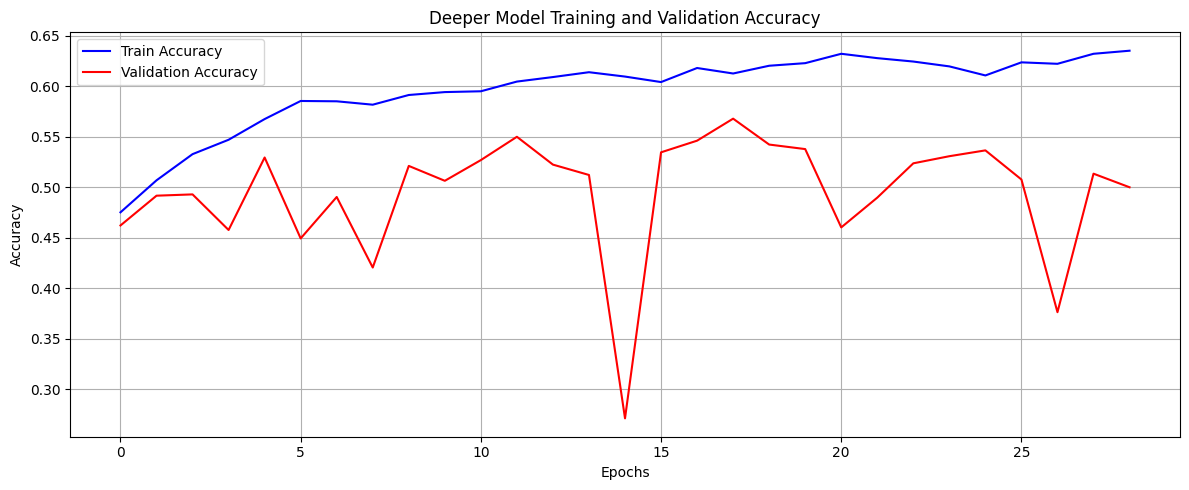

49/49 ━━━━━━━━━━━━━━━━━━━━ 156s 3s/step


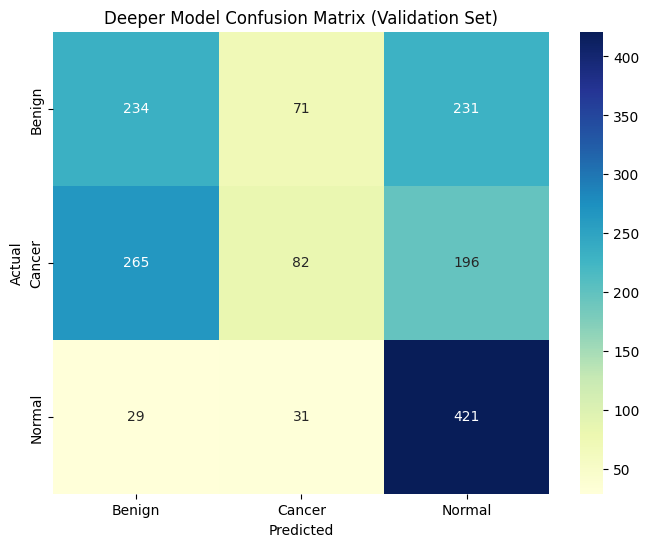

Deeper Model Scores
              precision    recall  f1-score   support

      Benign       0.44      0.44      0.44       536
      Cancer       0.45      0.15      0.23       543
      Normal       0.50      0.88      0.63       481

    accuracy                           0.47      1560
   macro avg       0.46      0.49      0.43      1560
weighted avg       0.46      0.47      0.42      1560

Deeper Model AUC-ROC (macro average): 0.7444


In [29]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Deeper Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs = deeper_model.predict(validation_set)
y_pred = np.argmax(Y_pred_probs, axis=1)
y_true = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Deeper Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Deeper Model Scores")
print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
auc_roc = roc_auc_score(y_true_bin, Y_pred_probs, average='macro', multi_class='ovr')
print(f"Deeper Model AUC-ROC (macro average): {auc_roc:.4f}")

### Narrower Model

In [40]:
narrower_model = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1), name='input_layer'),

    # 16 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 32
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 64 neurons
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')
], name="narrower_model")

narrower_model.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

narrower_model.summary()

Model: "narrower_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 224, 224, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_9             │ (None, 112, 112, 16)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_10            │ (None, 56, 56, 32)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_11            │ (None, 28, 28, 64)     │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,099 (109.76 KB)

 Trainable params: 27,875 (108.89 KB)

 Non-trainable params: 224 (896.00 B)

In [42]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('narrower_model.keras', save_best_only=True)

history = narrower_model.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs remain at 50
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 882s 4s/step - accuracy: 0.4801 - loss: 1.1179 - val_accuracy: 0.3372 - val_loss: 1.2334
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 870s 4s/step - accuracy: 0.5496 - loss: 0.9980 - val_accuracy: 0.3968 - val_loss: 1.2348
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 863s 4s/step - accuracy: 0.5379 - loss: 0.9659 - val_accuracy: 0.4321 - val_loss: 1.1703
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 863s 4s/step - accuracy: 0.5432 - loss: 0.9097 - val_accuracy: 0.5205 - val_loss: 1.1731
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 869s 4s/step - accuracy: 0.5758 - loss: 0.8721 - val_accuracy: 0.5269 - val_loss: 1.1707
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 863s 4s/step - accuracy: 0.5817 - loss: 0.8450 - val_accuracy: 0.4705 - val_loss: 1.4150
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 866s 4s/step - accuracy: 0.5664 - loss: 0.8316 - val_accuracy: 0.5058 - val_loss: 1.2201
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 870s 4s/step - accuracy: 0.5914 - loss: 0.8126 - val_accu

### Narrower Model Evaluation

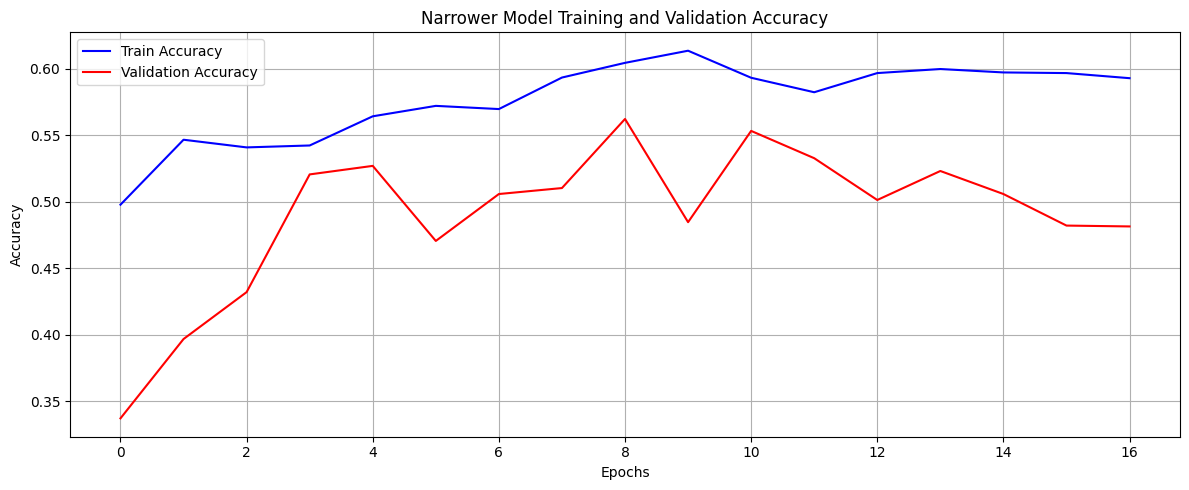

49/49 ━━━━━━━━━━━━━━━━━━━━ 193s 4s/step


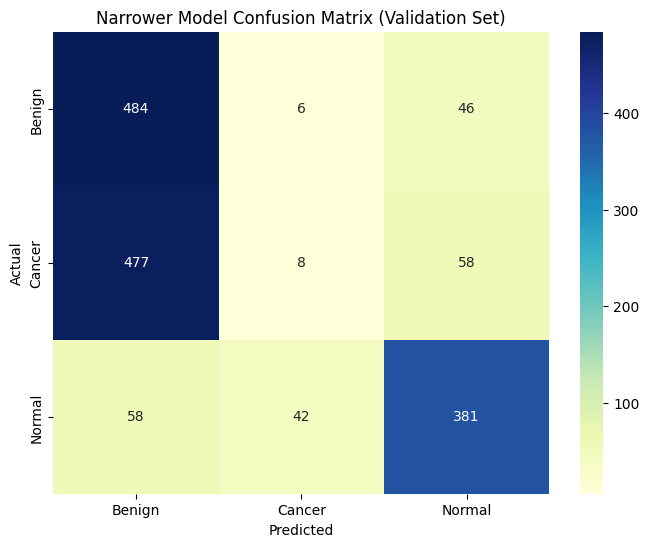

Narrower Model Scores
              precision    recall  f1-score   support

      Benign       0.47      0.90      0.62       536
      Cancer       0.14      0.01      0.03       543
      Normal       0.79      0.79      0.79       481

    accuracy                           0.56      1560
   macro avg       0.47      0.57      0.48      1560
weighted avg       0.46      0.56      0.47      1560

Narrower Model AUC-ROC (macro average): 0.7017


In [45]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Narrower Model Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs = narrower_model.predict(validation_set)
y_pred = np.argmax(Y_pred_probs, axis=1)
y_true = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Narrower Model Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Narrower Model Scores")
print(classification_report(y_true, y_pred, target_names=class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
auc_roc = roc_auc_score(y_true_bin, Y_pred_probs, average='macro', multi_class='ovr')
print(f"Narrower Model AUC-ROC (macro average): {auc_roc:.4f}")

### Narrower Model 2

In [61]:
# 2k (QHD) resolution: 2560 x 1440
img_height, img_width = 2560, 1440

In [63]:
narrower_model_two = models.Sequential([
    # Models input size
    layers.Input(shape=(img_height, img_width, 1), name='input_layer'),

    # 16 filters with 3×3 kernel and ReLU activation and L2 weight decay to penalize overly large weights and reduce overfitting
    layers.Conv2D(16, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    # This SpatialDropout2D is added, increasingly as well, to each pooling layer to encourage robustness in spatial feature learning
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 32
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.2),

    # Filter is being increased to 64
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),
    layers.SpatialDropout2D(0.3),

    # This replaces Flatten, averaging the spatial dimensions and reducing the number of parameters
    layers.GlobalAveragePooling2D(),

    # Fully connected layer with 64 neurons
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    # Randomly drops 50% of the nodes to minimize overfitting
    layers.Dropout(0.5),

    # Final layer for the 3-classes using softmax activation
    layers.Dense(3, activation='softmax')  # 3 classes: Benign, Cancer, Normal
], name="narrower_model_two")

narrower_model_two.compile(
    optimizer='adam',
    # categorical_crossentrop for multi-class classification with one-hot encoded labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

narrower_model_two.summary()

Model: "narrower_model_two"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 2560, 1440, 16) │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 2560, 1440, 16) │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 1280, 720, 16)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_15            │ (None, 1280, 720, 16)  │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 1280, 720, 32)  │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 1280, 720, 32)  │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 640, 360, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_16            │ (None, 640, 360, 32)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 640, 360, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 640, 360, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 320, 180, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout2d_17            │ (None, 320, 180, 64)   │             0 │
│ (SpatialDropout2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,099 (109.76 KB)

 Trainable params: 27,875 (108.89 KB)

 Non-trainable params: 224 (896.00 B)

In [65]:
# Early stopping to stop training if no changes after consecutive epochs
early_stopping = callbacks.EarlyStopping(patience=8, restore_best_weights=True)
# checkpoint acts as a save file to restore best model weights from training
checkpoint = callbacks.ModelCheckpoint('narrower_model_two.keras', save_best_only=True)

narrower_model_two_history = narrower_model_two.fit(
    # Training data
    training_set,
    # Validation data
    validation_data=validation_set,
    # epochs remain at 50
    epochs=50,
    # Class weights to address class imbalance
    class_weight=class_weights_dict,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1065s 5s/step - accuracy: 0.4582 - loss: 1.1588 - val_accuracy: 0.3949 - val_loss: 1.1893
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1160s 6s/step - accuracy: 0.5295 - loss: 1.0066 - val_accuracy: 0.3897 - val_loss: 1.1770
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1154s 6s/step - accuracy: 0.5316 - loss: 0.9546 - val_accuracy: 0.4487 - val_loss: 1.2589
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1152s 6s/step - accuracy: 0.5600 - loss: 0.9090 - val_accuracy: 0.4494 - val_loss: 1.1787
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 969s 5s/step - accuracy: 0.5658 - loss: 0.8822 - val_accuracy: 0.3622 - val_loss: 1.1573
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 950s 5s/step - accuracy: 0.5708 - loss: 0.8630 - val_accuracy: 0.4929 - val_loss: 1.3018
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 868s 4s/step - accuracy: 0.5756 - loss: 0.8440 - val_accuracy: 0.5372 - val_loss: 1.2207
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 937s 5s/step - accuracy: 0.5887 - loss: 0.8368 - val_

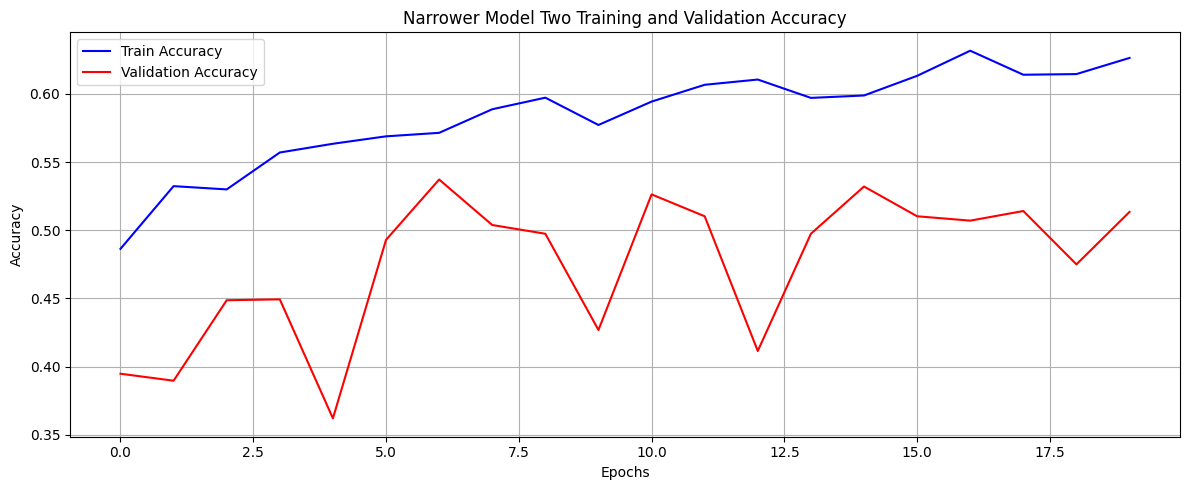

49/49 ━━━━━━━━━━━━━━━━━━━━ 187s 4s/step


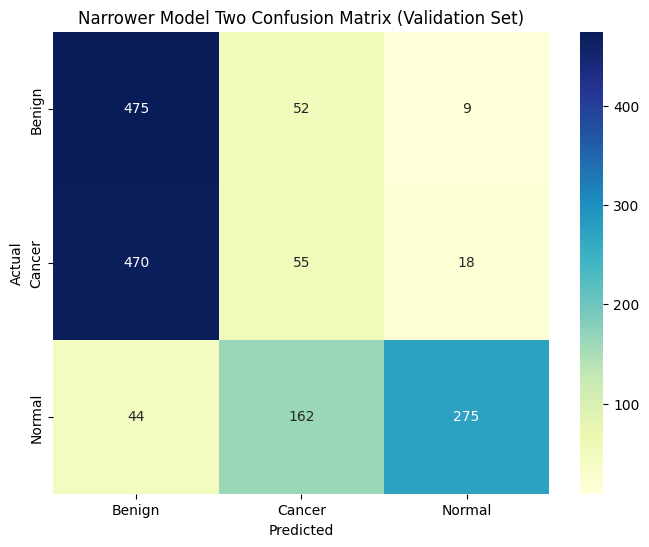

Narrower Model Two Scores
              precision    recall  f1-score   support

      Benign       0.48      0.89      0.62       536
      Cancer       0.20      0.10      0.14       543
      Normal       0.91      0.57      0.70       481

    accuracy                           0.52      1560
   macro avg       0.53      0.52      0.49      1560
weighted avg       0.52      0.52      0.48      1560

Narrower Model Two AUC-ROC (macro average): 0.5960


In [67]:
# Accuracy
plt.figure(figsize=(12, 5))
plt.plot(narrower_model_two_history.history['accuracy'], 'b-', label='Train Accuracy')
plt.plot(narrower_model_two_history.history['val_accuracy'], 'r-', label='Validation Accuracy')
plt.title('Narrower Model Two Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# This predicts labels for validation set
Y_pred_probs_two = narrower_model_two.predict(validation_set)
y_pred_two = np.argmax(Y_pred_probs_two, axis=1)
y_true_two = validation_set.classes
class_labels = list(validation_set.class_indices.keys())

# Confusion Matrix
cm_two = confusion_matrix(y_true_two, y_pred_two)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_two, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Narrower Model Two Confusion Matrix (Validation Set)')
plt.show()

# This prints classification Report for Precision, Sensitivity (Recall), F1-score
print("Narrower Model Two Scores")
print(classification_report(y_true_two, y_pred_two, target_names=class_labels, zero_division=0))

# Area Under the ROC Curve (AUC-ROC)
y_true_two_bin = label_binarize(y_true_two, classes=[0, 1, 2])
auc_roc_two = roc_auc_score(y_true_two_bin, Y_pred_probs_two, average='macro', multi_class='ovr')
print(f"Narrower Model Two AUC-ROC (macro average): {auc_roc_two:.4f}")

## Application of Transfer Learning

### Application of Transfer Learning Model

### Application of Transfer Learning Evaluation

## References

[1]	NHS Digital (2025) AI knowledge repository. [Online] Available at: https://digital.nhs.uk/services/ai-knowledge-repository (Accessed: 2025).

[2]	UK Government (2025) World-leading AI trial to tackle breast cancer launched. [Online] Available at: https://www.gov.uk/government/news/world-leading-ai-trial-to-tackle-breast-cancer-launched (Accessed: 2025).

[3]	Cheddad, A. (2021) The Complete Mini-DDSM [Data set]. Kaggle. [Online] Available at: https://www.kaggle.com/datasets/cheddad/miniddsm2 (Accessed: 2025).

[4]	Lekamlage, C.D., Afzal, F., Westerberg, E. and Cheddad, A. (2020) ‘Mini-DDSM: Mammography-based Automatic Age Estimation’, in Proceedings of the 3rd International Conference on Digital Medicine and Image Processing (DMIP 2020), Kyoto, Japan, 6–9 November. New York: ACM. [Online] Available at: https://arxiv.org/pdf/2010.00494v1 (Accessed: 2025).

[5]	Heath, M., Bowyer, K., Kopans, D., Moore, R. and Kegelmeyer, W.P. (2001) ‘The Digital Database for Screening Mammography’, in Yaffe, M.J. (ed.) Proceedings of the Fifth International Workshop on Digital Mammography. Madison, WI: Medical Physics Publishing, pp. 212–218. [Online] Available at: http://www.eng.usf.edu/cvprg/Mammography/software/HeathEtAlIWDM_2000.pdf (Accessed: 2025).

[6]	Wang, L. (2024) ‘Mammography with deep learning for breast cancer detection’, Frontiers in Oncology, 14, 1281922. doi: 10.3389/fonc.2024.1281922. [Online] Available at:	 https://www.frontiersin.org/journals/oncology/articles/10.3389/fonc.2024.1281922/full (Accessed: 2025).

[7]	Sawyer-Lee, R., Gimenez, F., Hoogi, A., & Rubin, D. (2016). Curated Breast Imaging Subset of Digital Database for Screening Mammography (CBIS-DDSM) [Data set]. The Cancer Imaging Archive. doi: 10.7937/K9/TCIA.2016.7O02S9CY. Available at: https://doi.org/10.7937/K9/TCIA.2016.7O02S9CY

[8]	World Health Organization (WHO) and International Agency for Research on Cancer (IARC) (2024) Global cancer burden growing, amidst mounting need for services. Lyon, France; Geneva, Switzerland: WHO. [Online] Available at:	 https://www.who.int/news/item/01-02-2024-global-cancer-burden-growing--amidst-mounting-need-for-services (Accessed: 2025).

[9]	OHSU Knight Cancer Institute (2025) Understanding breast cancer. Oregon Health & Science University. [Online] Available at: https://www.ohsu.edu/knight-cancer-institute/understanding-breast-cancer (Accessed: 2025).

[10]	DePolo, J. and Fox, K. (2025) Understanding your pathology report – breast cancer stages. Breastcancer.org. [Online] Available at:	 https://www.breastcancer.org/pathology-report/breast-cancer-stages (Accessed: 2025).

[11]	Malhotra, P., El-Ashry, D., Rubio, M., Schlamadinger, D. and Sile, E. (2025) Mammograms: everything you need to know. Breast Cancer Research Foundation. [Online] Available at: 
https://www.bcrf.org/about-breast-cancer/mammogram-breast-cancer-screening/ (Accessed: 2025).

[12]	Cancer Research UK (2023) Getting diagnosed with breast cancer – breast screening. [Online] Available at: https://www.cancerresearchuk.org/about-cancer/breast-cancer/getting-diagnosed/screening-breast (Accessed: 2025).

[13]	Cerdas, M.G., Farhat, J., Elshafie, S.I., Mariyam, F., James, L., Qureshi, A.K., Potru, M., Paliwei, P., Joshi, M.R., Abraham, G. and Siddiqui, H.F. (2025) ‘Exploring the evolution of breast cancer imaging: a review of conventional and emerging modalities’, Cureus. doi: 10.7759/cureus.82762. [Online] Available at:	 https://acsjournals.onlinelibrary.wiley.com/doi/full/10.3322/caac.21863 (Accessed: 2025).

[14]	Srivastava, A., Ahmad, R., Yadav, K., Siddiqui, S., Trivedi, A., Misra, A., Mehrotra, S., Ahmad, B.A., and Khan, M.A. (2024) ‘An update on existing therapeutic options and status of novel anti-metastatic agents in breast cancer: elucidating the molecular mechanisms underlying the pleiotropic action of Withania somnifera (Indian ginseng) in breast cancer attenuation’, International Immunopharmacology, 136, 112232. doi: 10.1016/j.intimp.2024.112232. [Online] Available at:	 https://onlinelibrary.wiley.com/doi/full/10.1155/2024/9003572 (Accessed: 2025).

[15]	UK Government (2024) Independent investigation of the NHS in England: Lord Darzi's report. Department of Health and Social Care. [Online] Available at: https://www.gov.uk/government/publications/independent-investigation-of-the-nhs-in-england (Accessed: 2025).
